## doubts
1. not sure how to decide which users to make predictions on
i thought only user having transaction during the month should be included
user who has his expiry in the given month is also to be included.
confusion is that train data has made prediction for users who are not having any transaction in given month. 
    basically for older transaction and already churned.
-> competition owner have given a sample submission file
    candidates to make prediction on are given in there.
    older users who have already churned are marked churned by the given logic hence they are there in train file??

2. should the time window be variable across months?
 should 30, 28, 31 day differnce make be taken or 30 days from given date be taken 
-> time window is on month bases not 30 day window

## Notes 
1. how to decide if we should make a prediction for given user
given a user we check when his membership expiry is. 
if it is within given time window we make a prediction

2. for given user how to compute a churn logic
given a user we check his transaction. 
...

3. why do both training and test have only 2 columns. and data is divided into multiple files 
all the files have common identifier column (msno)
target column is is_churn
we have to create feature using 3 other dataset by joining them
since data size is relatively large data is divided into multiple files.
data owner has given a wide range of options to tackle the prediction

4. the training dataset has 992931 rows while test data has 970960 rows. is it common to have 51:49 data split?
train contains data from february 2017, test data from march 2017. 
51:49 split indicate that the amount of users whose subscription expires in february is about the same 
as the amount of users whose subscription expires in march. train set is usually bigger 
but due to nature of problem test dataset is almost equal

5. what strategies would you propose to takle the problem of having your data split on 5 differnt data frames

6. suggestion on someone elses eda plan
- load the packages
- load data of all the dataframes
- check the data integritiy , classes set properly (column has character classs but it should be numeric)
- descriptive statistics for each data frame
- univariate and multivariate EDA


# files
- train.csv contains training set data msno and is_churn (ground truth label)
- train_v2.csv contains train data refreshed 11/06/2017 contain churn data for march 2017
- sample_submission_zero.csv constins test set contains user ids 
- sample_submission_v2.csv contains test data for regreshed 11/06/2017 test data for april 2017

- transactions.csv contains transactions of user until 2/28/2017
- transactions_v2.csv contains transactions of user until 3/31/2017

- user_logs.csv contains users listening behaviour daily logs until 2/28/2017
- user_logs_v2.csv contains users listening behaviour daily logs until 3/31/2017

- members_v3.csv contains user information


# steps before processing
~- merge train and train_v2~
~- merge transaction and transaction_v2~
~- merge user_logs and user_logs_v2~
***Note
i should not mix train and train v2 since i am using train v2 as test data.
others in the competition were submitting their final result, in that case it is ok to train on v2

Q: why was v2 released??



- take train data as training labels
- train_v2 = sample_sumbission_zero (new test data)

train = train.csv
test = train_v2

final test = sample_submission_v2
verify sample_submission_zero with train_v2

# notes
- i 

In [1]:
# verify train v2 and sample submission file has same users
# dd.compute(train_v2_df.msno.nunique(), submission_df.msno.nunique())

In [2]:
# train is train data
# train_v2 is test data
# 
# filter users from train data and use it for eda and training model
# evaluate model on train_v2 == test data 

# only use following dataset for eda
# train.csv
# memebers.csv
# transactions.csv
# user_logs.csv

# merge transaction with train data and then check
# do i need to analyse users only in train or train and rest of the users
# since users who do not fall in this month are not included?

# Index
1. Introduction  
   1.1 Load libraries and helper functions  
   1.2 Load data  
   1.3 File structure and content  
   1.4 Missing values  
   1.5 Reformat features  
2. Individual feature visualization (univariate analysis)  
   2.1 Train and members data  
   2.2 Transaction data  
   2.3 User log  
3. Dataset relationships (bivariate analysis)  
   3.1 Churn rate  
      3.1.1 Members dataset  
      3.1.2 Users logs dataset  
      3.1.3 Transactions dataset  
4. Data cleaning  
5. Multi-feature relationships (multivariate analysis)  


## 1. Introduction

The WSDM - KKBox’s Churn Prediction Challenge aims to predict whether a user of the music streaming service KKBox will churn, i.e., discontinue their subscription, based on user behavior and subscription details. This document outlines the exploratory data analysis (EDA) process, addressing doubts, clarifying approaches, and defining strategies for handling the dataset.

The data is divided into multiple files, each serving a specific purpose:

- **`train.csv`**: Contains user IDs and churn labels (ground truth) for February 2017.
- **`train_v2.csv`**: Refreshed data containing churn labels for March 2017, released on 11/06/2017.
- **`sample_submission_zero.csv`**: Test dataset for predictions, based on March 2017.
- **`sample_submission_v2.csv`**: Updated test dataset for April 2017, released alongside `train_v2.csv`.
- **`transactions.csv`** and **`transactions_v2.csv`**: User transaction details, including payment methods and subscription cancellations, up to 02/28/2017 and 03/31/2017, respectively.
- **`user_logs.csv`** and **`user_logs_v2.csv`**: Daily user listening behavior logs up to 02/28/2017 and 03/31/2017, respectively.
- **`members_v3.csv`**: User demographic information, including age, city, and membership details.



---

## Key Doubts and Clarifications
### Prediction Criteria
- Predictions should include users:
  - Who have transactions during the target month.
  - Whose memberships expire within the target month.
  
  However, training data includes predictions for some users who neither had transactions during the target month nor were active, possibly to account for historical transactions or already churned users.

**Clarification:** The competition provides a **sample submission file** identifying candidates for predictions. Older users marked as churned by this logic are present in the training data to align with the competition’s guidelines.

---

### Time Window for Analysis
- Should we consider variable-length time windows (28, 30, or 31 days)?
  
**Answer:** The time window is based on calendar months, not a fixed 30-day period. For consistency, February has 28 days, while other months follow their respective lengths.

---

## Dataset Notes and Observations

### Data Structure
- Training and test datasets (`train.csv` and `sample_submission_zero.csv`) only have two columns: `msno` (user ID) and `is_churn` (target variable).
- The supporting datasets (`transactions`, `user_logs`, and `members`) provide features to enrich the analysis and prediction process.

**Reason for Split:** The datasets are large, and separating them ensures manageability. Each dataset can be linked using the `msno` column, which acts as a common identifier.

---

### Data Size and Split
- **Training set size**: 992,931 rows (February 2017).
- **Test set size**: 970,960 rows (March 2017).

This near-equal split (51:49) reflects the similar number of users whose memberships expired in these months. While training sets are typically larger, the nature of this problem results in almost equal sizes.

---

### Updated Data Release (`train_v2.csv` and `sample_submission_v2.csv`)
- **Reason for `v2` Release:** The updated datasets (`train_v2.csv` and `sample_submission_v2.csv`) extend the time period for analysis to March and April 2017, enabling participants to refine their models.

---

## Strategy for Multi-File Handling
To effectively utilize the five datasets, the following steps are recommended:

1. **Merging Datasets**:  
   - Combine `transactions.csv` and `transactions_v2.csv` to include transactions up to 03/31/2017.
   - Merge `user_logs.csv` and `user_logs_v2.csv` for user activity data up to 03/31/2017.

2. **Feature Engineering**:  
   - Use `transactions` data to compute subscription trends and payment behavior.
   - Extract listening behavior metrics from `user_logs`.
   - Incorporate demographic details from `members_v3`.

3. **Ensure Integrity**:  
   - Check for data consistency across merged files.
   - Address class mismatches (e.g., numeric columns improperly set as strings).

4. **EDA Approach**:  
   - Perform descriptive statistics and visualizations for univariate and multivariate analysis.
   - Analyze correlations between features and the target variable (`is_churn`).

---

##  Addressing EDA Concerns

### Proposed Steps for EDA
1. Load necessary libraries.
2. Load all datasets, ensuring compatibility and integrity.
3. Conduct data cleaning:
   - Resolve data type mismatches.
   - Handle missing values appropriately.
4. Perform descriptive statistics:
   - Summarize each dataset.
   - Identify trends in user behavior, transactions, and demographics.
5. Analyze relationships:
   - Univariate analysis (e.g., churn rates by age or city).
   - Multivariate analysis (e.g., churn probability by payment method and listening behavior).

###  Tackling Data Size Challenges
Given the dataset size, consider:
- Sampling for quick iterations.
- Using distributed computing frameworks like Spark for large-scale processing.
- Employing SQL for efficient dataset joins and queries.


## Next Steps
1. Define training and test sets:
   - `train.csv` serves as the training set for February 2017 churn predictions.
   - `train_v2.csv` acts as the test set for March 2017 churn predictions.


### 1.1 Load Libraries and Helper Functions

In [107]:
import dask.dataframe as dd
import numpy as np
from IPython.display import display
from dask.distributed import Client, LocalCluster
import dask

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Set up a Dask Cluster
cluster = LocalCluster(n_workers=6, threads_per_worker=1, memory_limit='18GB')
client = Client(cluster)

print("client link:")
print(client.dashboard_link)  # Clickable link to the dashboard


client link:
http://127.0.0.1:8787/status


In [6]:
# setup Variables for filepaths
DATA_DIR="../../data"

MEMBERS_FILE=f"{DATA_DIR}/members_v3.csv"
TRANSACTION_FILE=f"{DATA_DIR}/transactions.csv"
TRAIN_FILE=f"{DATA_DIR}/train.csv"
USERLOG_FILE=f"{DATA_DIR}/user_logs.csv"
SAMPLE_SUBMISSION_FILE=f"{DATA_DIR}/sample_submission_zero.csv"

TRANSACTION_V2_FILE=f"{DATA_DIR}/transactions_v2.csv"
TRAIN_V2_FILE=f"{DATA_DIR}/train_v2.csv"
USER_LOGS_V2_FILE=f"{DATA_DIR}/user_logs_v2.csv"
SAMPLE_SUBMISSION_V2_FILE=f"{DATA_DIR}/sample_submission_v2.csv"

In [7]:
print(f"DATA_DIR: {DATA_DIR}")
print(f"TRANSACTION_FILE: {TRANSACTION_FILE}")
print(f"USERLOG_FILE: {USERLOG_FILE}")
print(f"TRAIN_FILE: {TRAIN_FILE}")
print(f"SAMPLE_SUBMISSION_FILE: {SAMPLE_SUBMISSION_FILE}")
print(f"MEMBERS_FILE: {MEMBERS_FILE}")
print()
print(f"TRANSACTION_V2_FILE: {TRANSACTION_V2_FILE}")
print(f"USER_LOGS_V2_FILE: {USER_LOGS_V2_FILE}")
print(f"TRAIN_V2_FILE: {TRAIN_V2_FILE}")
print(f"SAMPLE_SUBMISSION_V2_FILE: {SAMPLE_SUBMISSION_V2_FILE}")

DATA_DIR: ../../data
TRANSACTION_FILE: ../../data/transactions.csv
USERLOG_FILE: ../../data/user_logs.csv
TRAIN_FILE: ../../data/train.csv
SAMPLE_SUBMISSION_FILE: ../../data/sample_submission_zero.csv
MEMBERS_FILE: ../../data/members_v3.csv

TRANSACTION_V2_FILE: ../../data/transactions_v2.csv
USER_LOGS_V2_FILE: ../../data/user_logs_v2.csv
TRAIN_V2_FILE: ../../data/train_v2.csv
SAMPLE_SUBMISSION_V2_FILE: ../../data/sample_submission_v2.csv


### 1.2 Load Data 
Due to the large size of the datasets, full loading may lead to memory issues during exploration. To address this, we selectively load a subset of the data:

- members.csv: Load 1 million rows (~20% of the total data).
- transactions.csv: Load 1 million rows (~5% of the total data).
- user_logs.csv: Load 5 million rows (~0.25% of the total data).

This approach provides a manageable subset for exploration while ensuring that a representative sample of the data is available for analysis. Once the exploration and feature engineering are complete, the full dataset can be utilized for modeling in a resource-optimized environment.

In [20]:
train_df = dd.read_csv(TRAIN_FILE)
# test_df = dd.read_csv(SAMPLE_SUBMISSION_FILE)
transaction_df = dd.read_csv(TRANSACTION_FILE)
member_df = dd.read_csv(MEMBERS_FILE)

user_log_df = dd.read_csv(USERLOG_FILE)

In [21]:
row_limit= 5e6
sample_size = row_limit/len(user_log_df)
print(f"sample size : {sample_size}")
user_log_df_sample = user_log_df.sample(frac=sample_size).compute()
user_log_df_sample

sample size : 0.01275163623066601


,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
146617,WmqCEmUwes9GgcgKkAwGphLcaYXvPeJTsGTKr0gMCJ0=,20160511,6,0,0,1,108,98,27592.821
534786,9eC2afsum56fH22ndSbH4O3889DiqqIWONljbt316TU=,20161223,14,0,2,0,46,39,11087.466
141902,rHQWktxFboWLpurp5W2VGPYmwvcZX1kjVhde3EkybZo=,20151210,40,0,0,1,8,47,2526.619
538254,dO8CbCtV2FChtgkaMA3vJ0OnecKEjLCVPiQvV56bhB8=,20150324,1,2,0,0,0,3,266.978
4818,KxaLiz+jRYwB/18CR3MQVL0eSVeX+WkUE+zW0n0AdXI=,20150129,1,0,2,1,16,6,4478.777
...,...,...,...,...,...,...,...,...,...
118660,9NQuAjbohtP4HfQfOWK6t4s/I8DQIueG3oatStWhl74=,20150116,4,2,1,0,42,44,11863.859
634247,koGVHD0BS38XliFPmebRdtamSrPtQeGut5ypyRGoBf8=,20161226,2,0,1,0,45,40,10681.273
566672,11POqZ9TW1mJtCICTvQ52dBIGXDusqE3ibEVgWyFxRs=,20161006,0,0,1,1,13,9,3734.476
7776,1UFPVdwOaKDFyQPU4ios8QUPdmKCpA4TawxoWKpbBh4=,20170107,0,0,0,0,4,4,1082.000


### 1.3 File Structure and Content  
we will look at the structure and content of each of these dataframes

a. Train

In [22]:
train_df.describe().compute()

,is_churn
count,992931.000000
mean,0.063923
std,0.244616
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [23]:
train_df.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


we find that is_churn is ranging between 0 and 1.
msno is user id. Its a long character string

b. Memebers

In [24]:
member_df.describe().compute()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014100e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015122e+07
75%,5.000000e+00,2.400000e+01,9.000000e+00,2.016090e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [25]:
member_df.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,<NA>,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,<NA>,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,<NA>,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,<NA>,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [26]:
# dd.compute(member_df.city.nunique(), member_df.city.value_counts())

for each_column in ['city', 'gender', 'registered_via', 'bd','registration_init_time']:
    print(f"column : {each_column}")
    print("unique values: ",member_df[each_column].nunique().compute())
    display(member_df[each_column].value_counts().compute())
    print()

column : city
unique values:  21


2025-01-04 16:23:16,732 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 69373d3ea26e36f59261fc26a3ffa857 initialized by task ('shuffle-transfer-69373d3ea26e36f59261fc26a3ffa857', 1) executed on worker tcp://127.0.0.1:36995
2025-01-04 16:23:17,051 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 69373d3ea26e36f59261fc26a3ffa857 deactivated due to stimulus 'task-finished-1735987997.0507748'
2025-01-04 16:23:19,716 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle f57797de21b3ec8936824df6a6dd73b4 initialized by task ('shuffle-transfer-f57797de21b3ec8936824df6a6dd73b4', 0) executed on worker tcp://127.0.0.1:46537
2025-01-04 16:23:20,212 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle f57797de21b3ec8936824df6a6dd73b4 deactivated due to stimulus 'task-finished-1735988000.2114341'
2025-01-04 16:23:23,196 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle b633ca18875d39c4c984a0a25b27c040 initialized by task ('shuffle-transfer-b633ca18875d39

city
3       27282
7       11610
21      30837
16       5092
18      38039
19       1199
22     210407
5      385069
8       45975
10      32482
12      66843
13     320978
20       4233
1     4804326
4      246848
6      135200
9       47639
11      47489
14      89940
15     190213
17      27772
Name: count, dtype: int64


column : gender
unique values:  2


gender
female    1144613
male      1195355
Name: count, dtype: int64[pyarrow]


column : registered_via
unique values:  18


registered_via
 3     1643208
 7      805895
 16        888
 18          5
 19        974
 2        1452
 5        3115
 8        3982
 10         10
-1           1
 13       5455
 1          43
 4     2793213
 6        1213
 9     1482863
 11      25047
 14        615
 17       1494
Name: count, dtype: int64


column : bd
unique values:  386


bd
-5978    1
-974     1
-525     1
-505     2
-502     1
        ..
 1309    1
 1949    1
 1954    1
 1958    1
 2011    2
Name: count, Length: 386, dtype: int64


column : registration_init_time
unique values:  4782


registration_init_time
20040401     156
20040402     128
20040409      57
20040422      21
20040501      16
            ... 
20170404    2238
20170409    2125
20170410    1641
20170415    2396
20170419    1670
Name: count, Length: 4782, dtype: int64

In [27]:
# for each_column in ['city', 'gender', 'registered_via']:
#     stats = member_df.groupby(each_column)['msno'].count().compute()
#     print(f"column : {each_column} :: count {len(stats)}")
#     display(stats)
#     print()


- city has 21 unique values, from 1-22, "2" is missing.
- bd is the age of the user acording to the data description. it clearly contains outliers
- gender is given by string, some of the values seems to be missing.
- registerd_via has 18 diffrent values. 
- registration_init_time needs to be formated with date time format

c. transaction

In [28]:
transaction_df.describe().compute()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07,2.154775e+07
mean,3.893310e+01,3.133906e+01,1.398850e+02,1.419873e+02,8.519661e-01,2.015760e+07,2.015862e+07,3.976523e-02
std,3.507936e+00,3.035649e+01,1.309647e+02,1.324824e+02,3.551336e-01,6.155979e+03,7.755753e+03,1.954072e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,1.970010e+07,0.000000e+00
25%,3.800000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015091e+07,2.015102e+07,0.000000e+00
50%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016032e+07,2.016043e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016092e+07,2.016103e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017023e+07,2.017033e+07,1.000000e+00


In [29]:
transaction_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [30]:
transaction_df.columns

Index(['msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel'],
      dtype='object')

In [31]:
for each_column in ['payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel']:
    print(f"column : {each_column}")
    print("unique values: ",transaction_df[each_column].nunique().compute())
    display(transaction_df[each_column].value_counts().compute())
    print()

column : payment_method_id
unique values:  40


payment_method_id
7         1094
18       16177
11        2129
14       13621
20       28278
25       13780
36      855115
37     1007689
4           15
15        1479
38     1703590
3          210
41    11526454
34      731539
24       16196
33      411164
40     2225283
26        4591
8          657
35      541399
13        6571
6          466
30      160957
16       11064
32      146481
17        7437
23       42386
12        3834
22       20130
31      252342
5          474
21       22883
28       95733
19       32073
39     1466655
1           12
10        1326
29      113885
2           52
27       62525
Name: count, dtype: int64


column : payment_plan_days
unique values:  37


payment_plan_days
7        577639
360        5486
14         6365
120       10007
395       10790
410       80139
15           21
3            59
95            1
180       52272
400        1856
35          825
30     18956290
66          175
450        1271
0        870124
110         159
45         1082
200        5838
240        1088
80          342
100       24154
270         190
31       766608
415           1
425           1
21          869
70          587
99          339
230         103
365         312
1          4759
10        38216
60         7167
195      110234
90        12310
2            67
Name: count, dtype: int64


column : plan_list_price
unique values:  51


plan_list_price
298         5272
596           70
699          915
799         6264
120         5821
149     12536656
760            3
1150         103
129      1144459
134         3743
1825           2
15            50
44             1
894       109879
50          1051
210           26
800           11
1520          13
1788       80066
150       382860
350          587
536        43506
1000         750
180       682533
400          342
105          348
131          374
1599       11463
35          7410
265           21
30             6
450         1455
500         1185
2000         118
0        1498544
600            3
100        80285
143          143
930         5082
126           99
300         5828
477        10847
480        22977
70           250
99       4853433
1            113
119        32280
10            67
447         4348
124          598
1200        5486
Name: count, dtype: int64


column : actual_amount_paid
unique values:  57


actual_amount_paid
298         5272
596           76
699          913
799         6465
120         4948
149     12460832
760            4
1150         105
129      1174670
134         4807
1825           2
15            50
894       113452
1800           1
41             5
50          1056
210           26
800           11
1520          13
1788       83991
1799           1
150       396210
350          606
536        44805
890            1
127           99
849            1
1000         783
180       680058
400          351
105          374
131          572
1599       12086
35          7892
265           21
30             6
450         1501
500         1211
2000         122
0        1196876
45             1
600            3
100        80969
143          143
930         5121
300         5996
1802           1
477        10847
480        23170
70           250
99       4855208
1            113
119       355083
10            67
447         4375
124          598
1200        5526
Name: count,


column : is_auto_renew
unique values:  2


is_auto_renew
0     3189796
1    18357950
Name: count, dtype: int64


column : transaction_date
unique values:  790


transaction_date
20150104     16933
20150122     17035
20150226     16344
20150401     25384
20150416     17126
             ...  
20161202     27767
20161228     10376
20170101     36554
20170203     30954
20170228    120751
Name: count, Length: 790, dtype: int64


column : membership_expire_date
unique values:  1559


membership_expire_date
20130201         1
20130204         2
20130226         4
20130306         3
20130326        23
             ...  
20161228     10230
20170101     37415
20170203     34201
20170228    131179
20170313     16957
Name: count, Length: 1559, dtype: int64


column : is_cancel
unique values:  2


is_cancel
0    20690895
1      856851
Name: count, dtype: int64

In [86]:
print("transaction_date: ", dd.compute(
    transaction_df['transaction_date'].min(),
    transaction_df['transaction_date'].max())
)
print("membership_expire_date: ", dd.compute(
    transaction_df['membership_expire_date'].min(),
    transaction_df['membership_expire_date'].max())
)

transaction_date:  (20150101, 20170228)
membership_expire_date:  (19700101, 20170331)


In [87]:
# - column type of value, 
# - unique /range 
# - median/mean/popularity
# - diffrence between most dominant and general pattern (mean, median)





in transaction table
- payment_method_id re 40 differnt payment methods,
    some of them are heavity used while others are sparsly used.
- payment_plan_days there are 37 diffrent option in payment plan days. 
with longest being 450 days plan. om mean plan days have 31 days

- plan_list_price there are 51 diffrent option in plan prices
lowest plan price is 0. mean price of plan is 140 max going to 2000

Q: are there any free plans?? 

- actual_amount_paid  there are 57 diffrent variation. 
    this seems to be different from plan list price because of cancelation option mid way.

- is_auto_renew is binary in nature (0 or 1). around 85 % transactions are on auto is_auto_renew 
- transaction_date needs to be formated to datetype, ranging between  (20150101, 20170228)
- membership_expire_date needs to be formated to datetype, ranging between (19700101, 20170331)
    lower value 19700101 seems to be incorrect. need to investigate.
- is_cancel is binary in nature (0 or 1). 40% transaction are canceled


d. user log 

In [33]:
user_log_df_sample.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,2.015739e+07,6.491714e+00,1.637237e+00,1.015206e+00,1.126156e+00,3.067666e+01,3.004302e+01,-1.545837e+12
std,6.180010e+03,1.433859e+01,4.199862e+00,2.169861e+00,2.890508e+00,4.221294e+01,3.364458e+01,1.193962e+14
min,2.015010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-9.223372e+15
25%,2.015082e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.891214e+03
50%,2.016031e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.900000e+01,4.625024e+03
75%,2.016091e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.800000e+01,4.000000e+01,1.024966e+04
max,2.017023e+07,6.437000e+03,6.280000e+02,4.130000e+02,1.483000e+03,9.591000e+03,1.559000e+03,5.288140e+07


In [45]:
print(1.024966e+04
, 5.288140e+07)
print(1.024966e+04/3600
, 5.288140e+07/3600)


10249.66 52881400.0
2.8471277777777777 14689.277777777777


In [34]:
user_log_df_sample.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
146617,WmqCEmUwes9GgcgKkAwGphLcaYXvPeJTsGTKr0gMCJ0=,20160511,6,0,0,1,108,98,27592.821
534786,9eC2afsum56fH22ndSbH4O3889DiqqIWONljbt316TU=,20161223,14,0,2,0,46,39,11087.466
141902,rHQWktxFboWLpurp5W2VGPYmwvcZX1kjVhde3EkybZo=,20151210,40,0,0,1,8,47,2526.619
538254,dO8CbCtV2FChtgkaMA3vJ0OnecKEjLCVPiQvV56bhB8=,20150324,1,2,0,0,0,3,266.978
4818,KxaLiz+jRYwB/18CR3MQVL0eSVeX+WkUE+zW0n0AdXI=,20150129,1,0,2,1,16,6,4478.777


In [35]:
# user_log_df_sample.columns

In [36]:
# row_limit= 5e6
# sample_size = row_limit/len(user_log_df)
# print(f"sample size : {sample_size}")
# user_log_df_sample = user_log_df.sample(frac=sample_size)
# user_log_df_sample.persist()

In [37]:
# user_log_df_sample = user_log_df.sample(frac=sample_size)
# user_log_df_sample.persist()

In [38]:
# # del user_log_df_sample
# import gc
# gc.collect()

In [39]:

# for each_column in ['date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
#        'num_unq', 'total_secs']:
#     print(f"column : {each_column}")
#     print("unique values: ",user_log_df_sample[each_column].nunique().compute())
#     display(user_log_df_sample[each_column].value_counts().compute())
#     print()

In [42]:
user_log_df_sample.date.min(), user_log_df_sample.date.max()

(20150101, 20170228)

in user logs
- date : date needs to be formated to datetime format, it is in range of (20150101, 20170228)

following fields are number of songs listend upto 25%,50%, 75%, 98.5%, 100% of song length on that day
- num_25: 
- num_50
- num_75
- num_985
- num_100

based on the mean of all above fields it seems like most of the users make a decision whether to listen or not in 1st 25% of the song. else they mostly listen to the full song.
mean of these fields goes from 6 songs at 25% to 1-2 songs for 50-98.5% and 31 songs at 100%.


number of unique songs listened by users on that day
- num_unq: mean is 30 songs and median is 19 songs

- total_secs : min total secs seems to show in negatives which is questionable. max it seems to be
    75% of total sec is 10249.66 which is around 2.84h
    100% of total sec is around 52881400.0 which is around 14689.28h which seems like an outlier value, since day only has 24h

In [52]:
total_mean_songs = sum([6.491714e+00,	1.637237e+00,	1.015206e+00,	1.126156e+00,	3.067666e+01])/100
print("mean %",		6.491714e+00/total_mean_songs,	1.637237e+00/total_mean_songs,	1.015206e+00/total_mean_songs,	1.126156e+00/total_mean_songs,	3.067666e+01/total_mean_songs,"|",	3.004302e+01/total_mean_songs)
print("mean",		6.491714e+00,	1.637237e+00,	1.015206e+00,	1.126156e+00,	3.067666e+01,"|",	3.004302e+01)
print("std",		1.433859e+01,	4.199862e+00,	2.169861e+00,	2.890508e+00,	4.221294e+01,"|",	3.364458e+01)

mean % 15.853953355721803 3.9984323139099933 2.4793188009282154 2.7502790010875775 74.91801652835241 | 73.3705517133098
mean 6.491714 1.637237 1.015206 1.126156 30.67666 | 30.04302
std 14.33859 4.199862 2.169861 2.890508 42.21294 | 33.64458


In [53]:
user_log_df_sample_local =user_log_df_sample.copy()

In [56]:
user_log_df_sample_local["total_songs"]= user_log_df_sample_local.apply(
    lambda x: sum([x['num_25'],	x['num_50'],	x['num_75'],	x['num_985'],	x['num_100']])
, axis=1)

In [59]:
for col in [ 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']:
    user_log_df_sample_local[f'perc_{col}'] = user_log_df_sample_local[col]*100/user_log_df_sample_local['total_songs']

In [61]:
user_log_df_sample_local.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_songs,perc_num_25,perc_num_50,perc_num_75,perc_num_985,perc_num_100,perc_num_unq
146617,WmqCEmUwes9GgcgKkAwGphLcaYXvPeJTsGTKr0gMCJ0=,20160511,6,0,0,1,108,98,27592.821,115,5.217391,0.000000,0.000000,0.869565,93.913043,85.217391
534786,9eC2afsum56fH22ndSbH4O3889DiqqIWONljbt316TU=,20161223,14,0,2,0,46,39,11087.466,62,22.580645,0.000000,3.225806,0.000000,74.193548,62.903226
141902,rHQWktxFboWLpurp5W2VGPYmwvcZX1kjVhde3EkybZo=,20151210,40,0,0,1,8,47,2526.619,49,81.632653,0.000000,0.000000,2.040816,16.326531,95.918367
538254,dO8CbCtV2FChtgkaMA3vJ0OnecKEjLCVPiQvV56bhB8=,20150324,1,2,0,0,0,3,266.978,3,33.333333,66.666667,0.000000,0.000000,0.000000,100.000000
4818,KxaLiz+jRYwB/18CR3MQVL0eSVeX+WkUE+zW0n0AdXI=,20150129,1,0,2,1,16,6,4478.777,20,5.000000,0.000000,10.000000,5.000000,80.000000,30.000000


In [62]:
user_log_df_sample_local.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_songs,perc_num_25,perc_num_50,perc_num_75,perc_num_985,perc_num_100,perc_num_unq
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,2.015739e+07,6.491714e+00,1.637237e+00,1.015206e+00,1.126156e+00,3.067666e+01,3.004302e+01,-1.545837e+12,4.094698e+01,1.720242e+01,5.106494e+00,3.379016e+00,3.797768e+00,7.051431e+01,8.078345e+01
std,6.180010e+03,1.433859e+01,4.199862e+00,2.169861e+00,2.890508e+00,4.221294e+01,3.364458e+01,1.193962e+14,4.871757e+01,2.028403e+01,1.026423e+01,7.781037e+00,8.822234e+00,2.735368e+01,2.353401e+01
min,2.015010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-9.223372e+15,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.599816e-02
25%,2.015082e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.891214e+03,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.384615e+01,7.058824e+01
50%,2.016031e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.900000e+01,4.625024e+03,2.500000e+01,1.020408e+01,1.020408e+00,0.000000e+00,0.000000e+00,7.777778e+01,9.000000e+01
75%,2.016091e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.800000e+01,4.000000e+01,1.024966e+04,5.400000e+01,2.600000e+01,6.250000e+00,4.166667e+00,4.411765e+00,9.322034e+01,1.000000e+02
max,2.017023e+07,6.437000e+03,6.280000e+02,4.130000e+02,1.483000e+03,9.591000e+03,1.559000e+03,5.288140e+07,9.591000e+03,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


In [81]:
# Global trend
total_mean_songs = user_log_df_sample_local[[ 'num_25', 'num_50', 'num_75', 'num_985', 'num_100']].mean().sum()
total_median_songs = user_log_df_sample_local[[ 'num_25', 'num_50', 'num_75', 'num_985', 'num_100']].median().sum()
print("median            : ")
print(user_log_df_sample_local[[ 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']].median())
print()
print("mean            : ")
print(user_log_df_sample_local[[ 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']].mean())
print()
print("normalized median : ")
print(user_log_df_sample_local[[ 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']].median() / (total_median_songs/100))
print()
print("normalized mean : ")
print(user_log_df_sample_local[[ 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']].mean() / (total_mean_songs/100))

median            : 
num_25      2.0
num_50      1.0
num_75      0.0
num_985     0.0
num_100    17.0
num_unq    19.0
dtype: float64

mean            : 
num_25      6.491714
num_50      1.637237
num_75      1.015206
num_985     1.126156
num_100    30.676662
num_unq    30.043015
dtype: float64

normalized median : 
num_25     10.0
num_50      5.0
num_75      0.0
num_985     0.0
num_100    85.0
num_unq    95.0
dtype: float64

normalized mean : 
num_25     15.853952
num_50      3.998432
num_75      2.479318
num_985     2.750280
num_100    74.918019
num_unq    73.370536
dtype: float64


if i take median and compare with mean i can see above pattern
- we can see that on mean 25% is at 6 decreases for 50-75% and tehn risez again at 100% to 30 songs
- on median its from 2 songs at 25% then decreases for 50-75% and then rizes again at 100% to 17 songs
- if we see the normalized view of mean and median we can see that 
- in general (median) 10% of the times users are leaving at 25% song length
    compared to active users (mean) at 16%
- in general 85% of the times users are listening to full song 
    compared to the most active users (mean users) at 75%


need to consider std while looking at these number , it tells variation across the population

In [68]:
user_log_df_sample_local.columns

Index(['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'total_songs', 'perc_num_25', 'perc_num_50',
       'perc_num_75', 'perc_num_985', 'perc_num_100', 'perc_num_unq'],
      dtype='object')

In [69]:
# local/relative trend
user_log_df_sample_local[[ 'perc_num_25', 'perc_num_50',
       'perc_num_75', 'perc_num_985', 'perc_num_100', 'perc_num_unq']].mean()

perc_num_25     17.202417
perc_num_50      5.106494
perc_num_75      3.379016
perc_num_985     3.797768
perc_num_100    70.514306
perc_num_unq    80.783447
dtype: float64

In a global trend of most active users
16% of times users are skipping the songs at 25% song length
4% time user are skipping at 50% song length
75% of times users are listening to 100% of song length

In local/relative trend ( this considers the pattern of most active as well , low usage users)
17% of times users are skipping the songs at 25% song length
5% time user are skipping at 50% song length
71% of times users are listening to 100% of song length

we can see that most active users are listening to full song. 
while general trend is more users are skipping at 25-50% song length by 1% delta

i tried to take % of the mean of songs listend in diffrent song length listened bins.
i din take the % across single user. i need to take % for a user then take a mean. since diffret users have different listening count.
what is the exact difference between 2 ways of calculation

->
The difference between your two methods arises from **when** and **how** the normalization (division by the sum) is applied and the implications it has on the calculation of the means.

### **Approach 1: Column-Wise Normalization of Means**

1. **Calculate the mean** for each column: \( \text{mean}_{25}, \text{mean}_{50}, \text{mean}_{75}, \text{mean}_{985}, \text{mean}_{100} \).
2. **Sum these means**: \( S = \text{mean}_{25} + \text{mean}_{50} + \text{mean}_{75} + \text{mean}_{985} + \text{mean}_{100} \).
3. **Normalize each mean** by dividing it by the sum \( S \): \( \frac{\text{mean}_{25}}{S}, \frac{\text{mean}_{50}}{S}, \ldots \).

#### **Inference**
- This approach gives you a proportional representation of each column’s contribution to the total of their means.
- The result is influenced by the aggregate patterns of each column across all users **before normalization**.
- It's a more **global perspective** since the mean calculation happens before the normalization.

---

### **Approach 2: Row-Wise Normalization Before Mean**

1. For each row (user/day), compute the sum of the columns \( \text{sum} = \text{num}_{25} + \text{num}_{50} + \text{num}_{75} + \text{num}_{985} + \text{num}_{100} \).
2. Normalize each column by dividing it by the row sum: \( \frac{\text{num}_{25}}{\text{sum}}, \frac{\text{num}_{50}}{\text{sum}}, \ldots \).
3. Calculate the **mean** for each normalized column.

#### **Inference**
- This approach normalizes the contribution of each column **within each user/day** before taking the mean. 
- It provides a more **local perspective** by considering the relative proportions for each user/day first, and then averaging these proportions across all users/days.
- It accounts for variability in total song activity per user/day and ensures each user/day contributes equally to the result, regardless of their absolute activity level.

---

### **Key Differences**

| Aspect                | Approach 1                                | Approach 2                                  |
|-----------------------|-------------------------------------------|--------------------------------------------|
| **Normalization Level** | Global (after mean calculation)          | Local (per row, before mean calculation)    |
| **Focus**             | Overall mean contribution of columns      | Relative contribution of columns per user/day |
| **Impact of Total Activity** | Users with high activity levels weigh more in the result | Equal weight given to all users/days       |
| **Use Case**          | Understanding overall trends or averages  | Understanding per-user or per-day behavior |

---

### **Example to Illustrate**

#### Data:
| User | num_25 | num_50 | num_75 | num_985 | num_100 |
|------|--------|--------|--------|---------|---------|
| A    | 10     | 20     | 30     | 40      | 50      |
| B    | 2      | 4      | 6      | 8       | 10      |

---

#### **Approach 1**:
1. Compute column means:
   - \( \text{mean}_{25} = \frac{10 + 2}{2} = 6 \),
   - \( \text{mean}_{50} = \frac{20 + 4}{2} = 12 \), and so on.
2. Sum of means:
   - \( S = 6 + 12 + 18 + 24 + 30 = 90 \).
3. Normalize:
   - \( \frac{\text{mean}_{25}}{S} = \frac{6}{90} \), \( \frac{\text{mean}_{50}}{S} = \frac{12}{90} \), and so on.

#### **Approach 2**:
1. Row-wise normalization:
   - For User A: \( \text{sum} = 10 + 20 + 30 + 40 + 50 = 150 \), so normalized row is \( \frac{10}{150}, \frac{20}{150}, \ldots \).
   - For User B: \( \text{sum} = 2 + 4 + 6 + 8 + 10 = 30 \), so normalized row is \( \frac{2}{30}, \frac{4}{30}, \ldots \).
2. Compute means for each normalized column:
   - \( \text{mean}_{25} = \frac{\frac{10}{150} + \frac{2}{30}}{2} \), and similarly for others.

---

### **Conclusion**
- Approach 1 reflects **aggregate trends**, emphasizing the absolute activity levels.
- Approach 2 highlights **relative behavior**, ensuring users with vastly different total activity levels are treated equally.

The two approaches provide different perspectives that can be used in data analysis depending on the question you want to answer. Here's how you can interpret and use each perspective:

---

### **Approach 1: Global Perspective (Mean First, Normalize Later)**

#### **When to Use**
- **Objective**: To understand the overall distribution of song engagement levels across all users/days, with **higher activity levels contributing more** to the result.
- This approach emphasizes the contribution of users/days with **higher total listening activity** (because their absolute counts will dominate the means).
- Use this when:
  - You're studying aggregate trends (e.g., "What percentage of songs, on average, are skipped early across all users?").
  - You want to **prioritize high-activity users/days** in your analysis, as their patterns will weigh more heavily.

#### **What to Infer**
- **Proportional Contribution**: The normalized means give you the relative contribution of each engagement level (e.g., num_25 vs. num_100) across the entire dataset.
- This helps identify which engagement levels dominate the global listening behavior.

---

### **Approach 2: Local Perspective (Normalize Per Row, Mean Later)**

#### **When to Use**
- **Objective**: To understand the **relative importance of engagement levels for each user/day**, regardless of their overall activity level.
- This approach gives **equal weight to each user/day** in the final result, focusing on per-user/day engagement proportions.
- Use this when:
  - You want to **compare users or days** more fairly by removing the effect of their total listening activity.
  - You're analyzing behaviors like **how users split their attention** among different engagement levels, irrespective of their total playtime.

#### **What to Infer**
- **Relative Behavior**: The normalized means reveal how users distribute their listening behavior on average. For example, it can show whether users tend to complete songs (high num_100 proportion) or skip them early (high num_25 proportion) **relative to their own activity.**
- This is especially useful when user behavior patterns (rather than absolute counts) are the focus.

---

### **How to Use Both Perspectives**

1. **Start with Global Trends (Approach 1)**:
   - Identify overall patterns in the data. For example, you might find that a significant portion of all activity is in the num_100 category (completed songs).
   - This gives you a high-level understanding of what's happening across the dataset.

2. **Drill Down into User-Level Behavior (Approach 2)**:
   - Examine whether users with lower total activity have the same engagement patterns as those with higher activity.
   - Compare groups or segments. For example:
     - Do high-activity users have a higher proportion of num_100 (completed songs)?
     - Are low-activity users more likely to have higher num_25 (early skips)?

3. **Combine Both Perspectives**:
   - Use the global view (Approach 1) to set a baseline or identify dominant trends.
   - Use the local view (Approach 2) to identify **anomalies**, **segments**, or **outliers** where individual behavior deviates from the global trends.

---

### **Practical Example**

#### Use Case: Understanding Song Completion Behavior
- **Question**: Are users completing songs more often overall, or does this vary significantly between high- and low-activity users?

1. **Approach 1**: 
   - Reveals that 70% of all song activity globally is in the num_100 category, suggesting strong song completion rates overall.
   - But this might be driven by a few high-activity users.

2. **Approach 2**: 
   - Reveals that while high-activity users complete songs 80% of the time (relative to their own activity), low-activity users only complete songs 50% of the time.
   - This uncovers a **behavioral difference** that would be masked in the global trend.

---

### **Takeaways**
- Use **Approach 1** for **overall trends** and when **absolute activity levels matter**.
- Use **Approach 2** for **comparative analyses**, focusing on user-level or row-level **proportions and patterns**.
- Together, they provide a richer understanding of both **aggregate** and **individual-level behavior**, allowing you to tailor your insights to the specific needs of your analysis.

...

### 1.4 Missing Values  


In [90]:
train_df.isna().sum().compute()

msno        0
is_churn    0
dtype: int64

In [130]:
member_df.isna().sum().compute()

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

In [92]:
transaction_df.isna().sum().compute()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [96]:
user_log_df_sample.isna().sum()

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

except for gender in members dataframe none other values seems to be missing

In [131]:
member_df['gender'] = member_df['gender'].fillna("Missing")

In [132]:
member_df.isna().sum().compute()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
dtype: int64

### 1.5 Reformat Features  

In [98]:
member_df['registration_init_time'] = dd.to_datetime(member_df.registration_init_time.astype(str))

In [88]:
transaction_df['membership_expire_date'] = dd.to_datetime(transaction_df.membership_expire_date.astype(str))
transaction_df['transaction_date'] = dd.to_datetime(transaction_df.transaction_date.astype(str))

In [89]:
user_log_df_sample['date'] = dd.to_datetime(user_log_df_sample.date.astype(str))

/run/media/shiv/e202b7b3-865c-4d22-9196-f1c9deb5d5f2/code/churn-prediction/cp_env/lib/python3.12/site-packages/distributed/client.py:3371: UserWarning: Sending large graph of size 152.59 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


## 2. Individual Feature Visualization (Univariate Analysis)  
first step, we look at various data individually. 
we will see relation between multiple data point later.

### 2.1 Train and Members Data
we start with train and member data. 
member data contains demographic information ( age, city, gender) together with registation dates

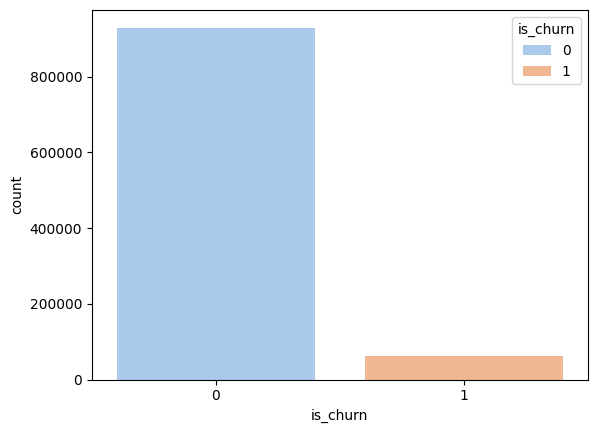

In [118]:
p1 = sns.countplot(data=train_df.compute(), x='is_churn',
    hue='is_churn', 
    palette="pastel")
plt.show()


In [124]:
global_churn_rate = 100*train_df.is_churn.mean().compute()
print(f"Global churn rate : {global_churn_rate:.2f}")

Global churn rate : 6.39


In [125]:
member_df.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time'],
      dtype='object')

Column : city


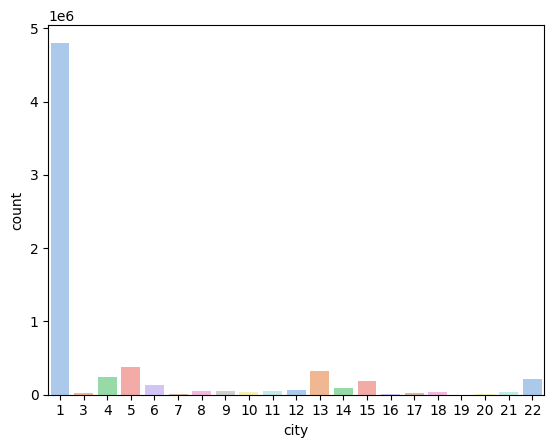

Column : registered_via


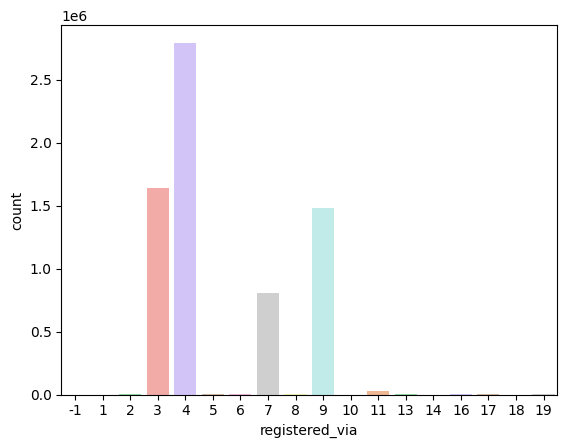

Column : gender


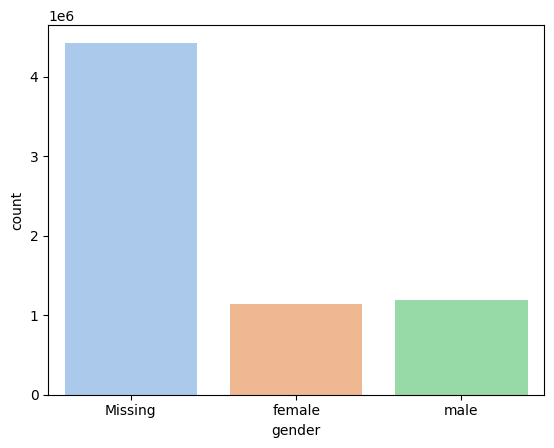

In [133]:
for each_column in ['city', 'registered_via', 'gender']:
    print(f"Column : {each_column}")
    p1 = sns.countplot(
        data=member_df.compute(),
        x=each_column,
        hue=each_column, 
        palette="pastel",
        legend=False
    )
    plt.show()

In [143]:
# print(filtered_member_df.bd.value_counts())
# print(filtered_member_df.bd.describe())
# print(filtered_member_df.bd.unique())

In [156]:
print(f"Column : age ")
filtered_member_df = member_df[
        (member_df['bd']>0) &
        (member_df['bd']<100)
    ].compute()

Column : age 


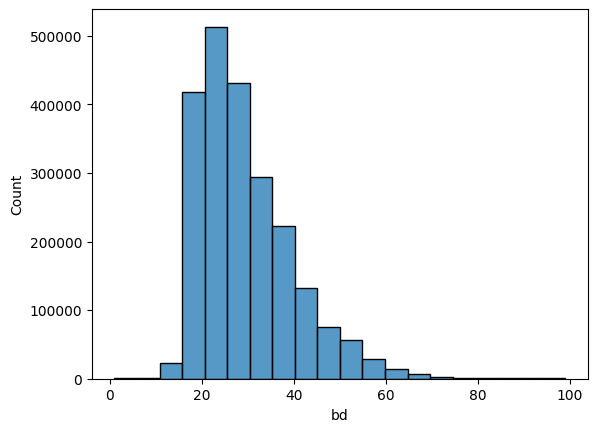

In [157]:
p1 = sns.histplot(
    data=filtered_member_df,
    x='bd',
    bins=20,
    # kde=False,
    legend=False
)
plt.show()

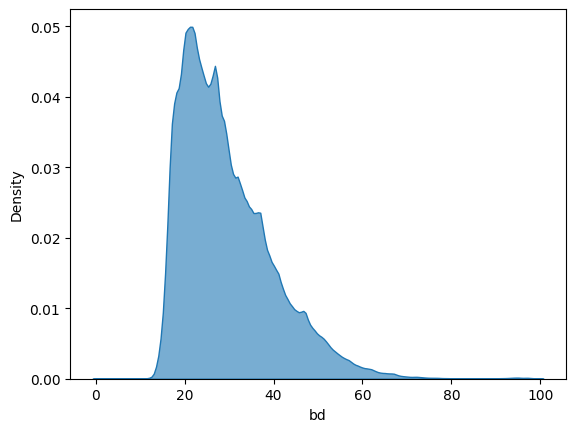

In [158]:
sns.kdeplot(
    data=filtered_member_df,
    x='bd',
    fill=True,
    warn_singular=False,  # Suppress the warning
    legend=False,
    alpha=0.6,  # Transparency for better overlay visibility
)
plt.show()

In [224]:
print("median age: ",filtered_member_df.bd.median())
print("mean age: ",filtered_member_df.bd.mean())

median age:  27.0
mean age:  29.483192442063373


column : registration_init_time


<Axes: xlabel='registration_init_time', ylabel='Count'>

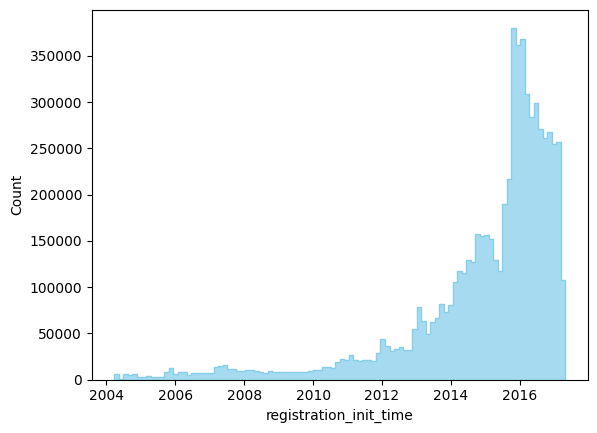

In [ ]:
print('column : registration_init_time')

sns.histplot(
    data=member_df.compute(),
    x='registration_init_time',
    bins=100,  # Adjust the number of bins as needed
    element='step',
    kde=False,  # Add kde=True if you want a density curve
    color="skyblue"
)



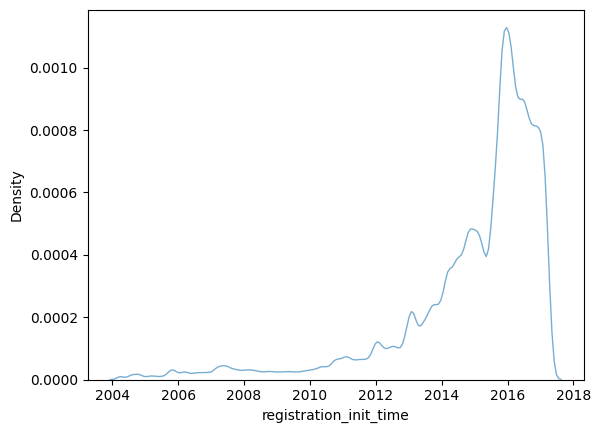

In [165]:
sns.kdeplot(
    data=member_df.compute(),
    x='registration_init_time',
    linewidth=1,
    # fill=True,
    # warn_singular=False,  # Suppress the warning
    legend=False,
    alpha=0.6,  # Transparency for better overlay visibility
)
plt.show()

In [184]:
member_df['registration_init_time'].compute()

0         2011-09-11
1         2011-09-14
2         2011-09-15
3         2011-09-15
4         2011-09-15
             ...    
1129882   2015-10-20
1129883   2015-10-20
1129884   2015-10-20
1129885   2015-10-20
1129886   2015-10-21
Name: registration_init_time, Length: 6769473, dtype: datetime64[ns]

[]

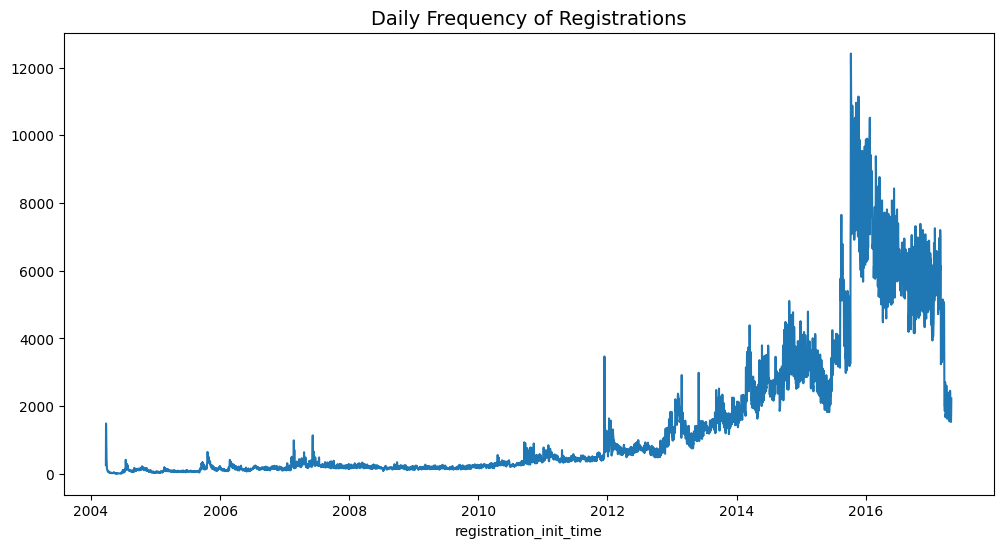

In [ ]:
# Compute the Dask DataFrame
registration_data = member_df['registration_init_time'].compute()
# Resample daily and count occurrences
daily_counts =registration_data.dt.date.value_counts()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=daily_counts.index,
    y=daily_counts.values,
    # color="skyblue",
    # alpha=0.6
)

plt.title("Daily Frequency of Registrations", fontsize=14)
plt.plot()

[]

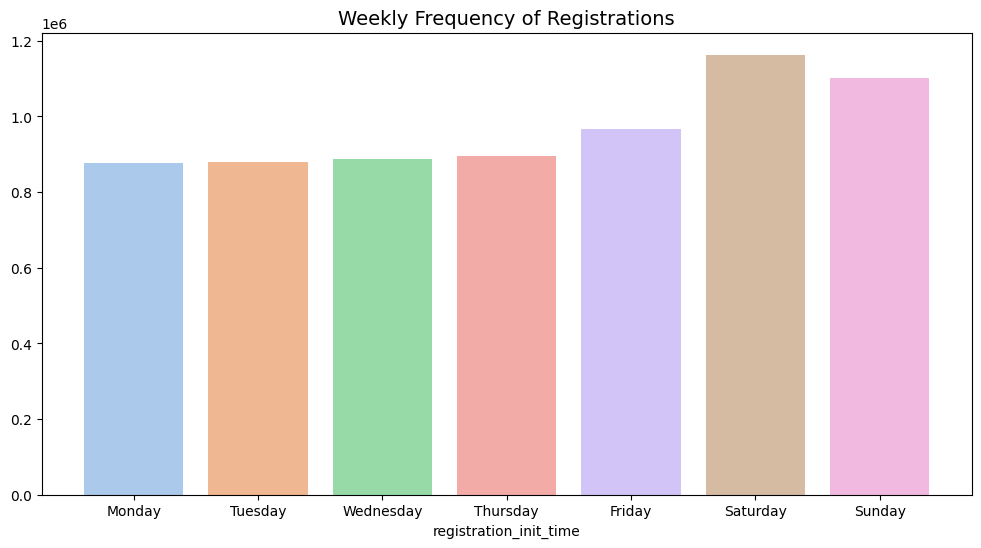

In [214]:
# Extract weekday (0=Monday, ..., 6=Sunday)
registration_data = member_df['registration_init_time'].compute()
# Resample daily and count occurrences
weekly_counts = registration_data.dt.weekday.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=weekly_counts.index,
    y=weekly_counts.values,
    hue=weekly_counts.index,
    palette="pastel",
    # alpha=0.6
    legend=False
)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Weekly Frequency of Registrations", fontsize=14)
plt.plot()


In [218]:
list(range(1,12))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

[]

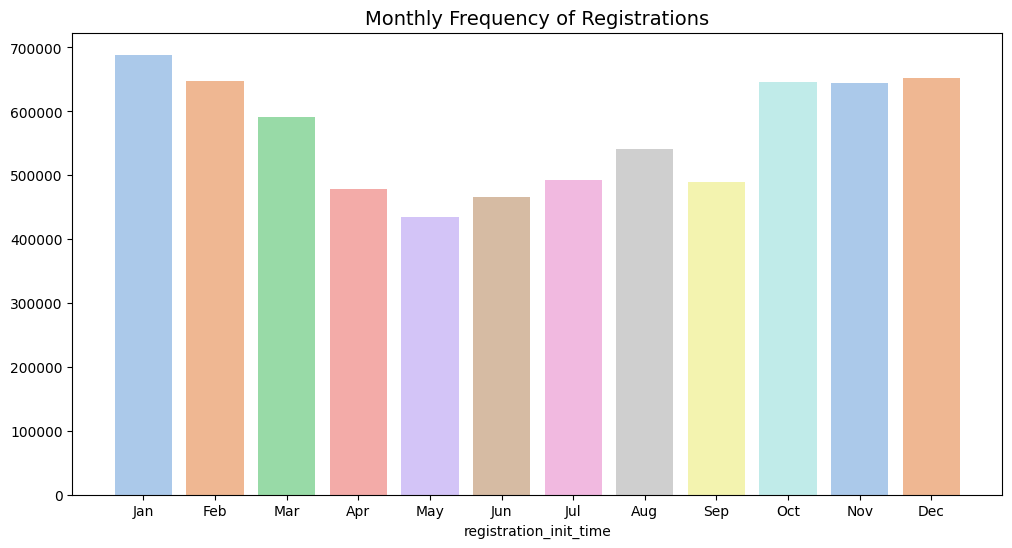

In [222]:
# Extract weekday (0=Monday, ..., 6=Sunday)
registration_data = member_df['registration_init_time'].compute()
# Resample daily and count occurrences
monthly_counts = registration_data.dt.month.value_counts()


plt.figure(figsize=(12, 6))
sns.barplot(
    x=monthly_counts.index,
    y=monthly_counts.values,
    hue=monthly_counts.index,
    palette="pastel",
    # alpha=0.6
    legend=False
)
plt.xticks(
    list(range(12)), 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
)
plt.title("Monthly Frequency of Registrations", fontsize=14)
plt.plot()


- Only about 6% of users seems to have left.
    this looks quite good. but makes the problem an
    inbalanced classification problem.
- in city column, city 1 has high count and 
    very low count for rest of the cities
- registered via has highest count for 4. followed by 3,7,9
    rest of the options have very few counts
- most of the users have prefered to not give gender. 
    for those who have given gender data 
    distribution among male and female is equal
- for age after filtering follows normal distribution.
    peak age is between 20-30. 
    median age is 27 and mean age is 29.
- registriation init time shows that no of user
    after slow start , registration has increased from 2010 to 2016. 
    after 2016 there is decline in no of registration.
- in weekly pattern of registration init time , we can see that most of the users have registered on weekends. saturday being the higest followed by sunday and friday. 
for weekdays its almost same for all the days.

- in the monthly pattern of registation init time , we can see that most no of registation happen from oct -jan, then we see a decline in regisation from feb - may. then it starts to increase back again from may-sep

this pattern is general pattern seen from 2015 till 2017. it would be intresting to check only recent years and compare it with general trend.

Note:
- for categorical values bargraph
- for continous values density plot

### 2.2 Transaction Data  
in transaction data we find payment and membership related information

In [225]:
transaction_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0


In [226]:
transaction_df.columns

Index(['msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel'],
      dtype='object')

3713

Column : payment_method_id


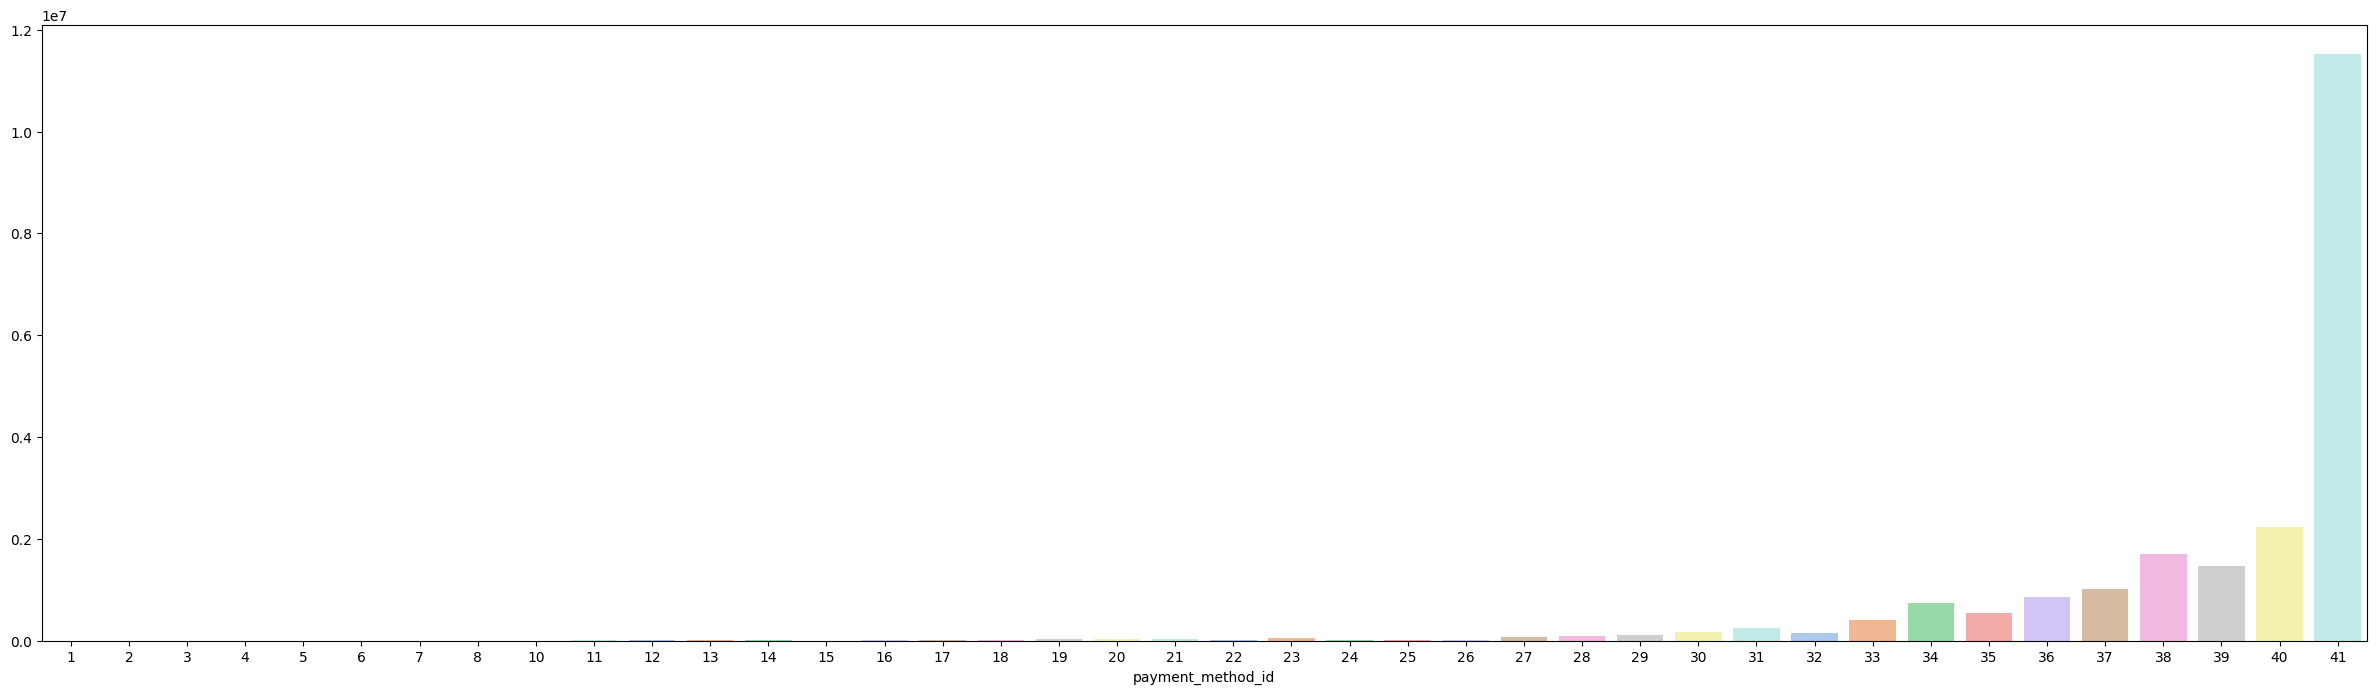

Column : payment_plan_days


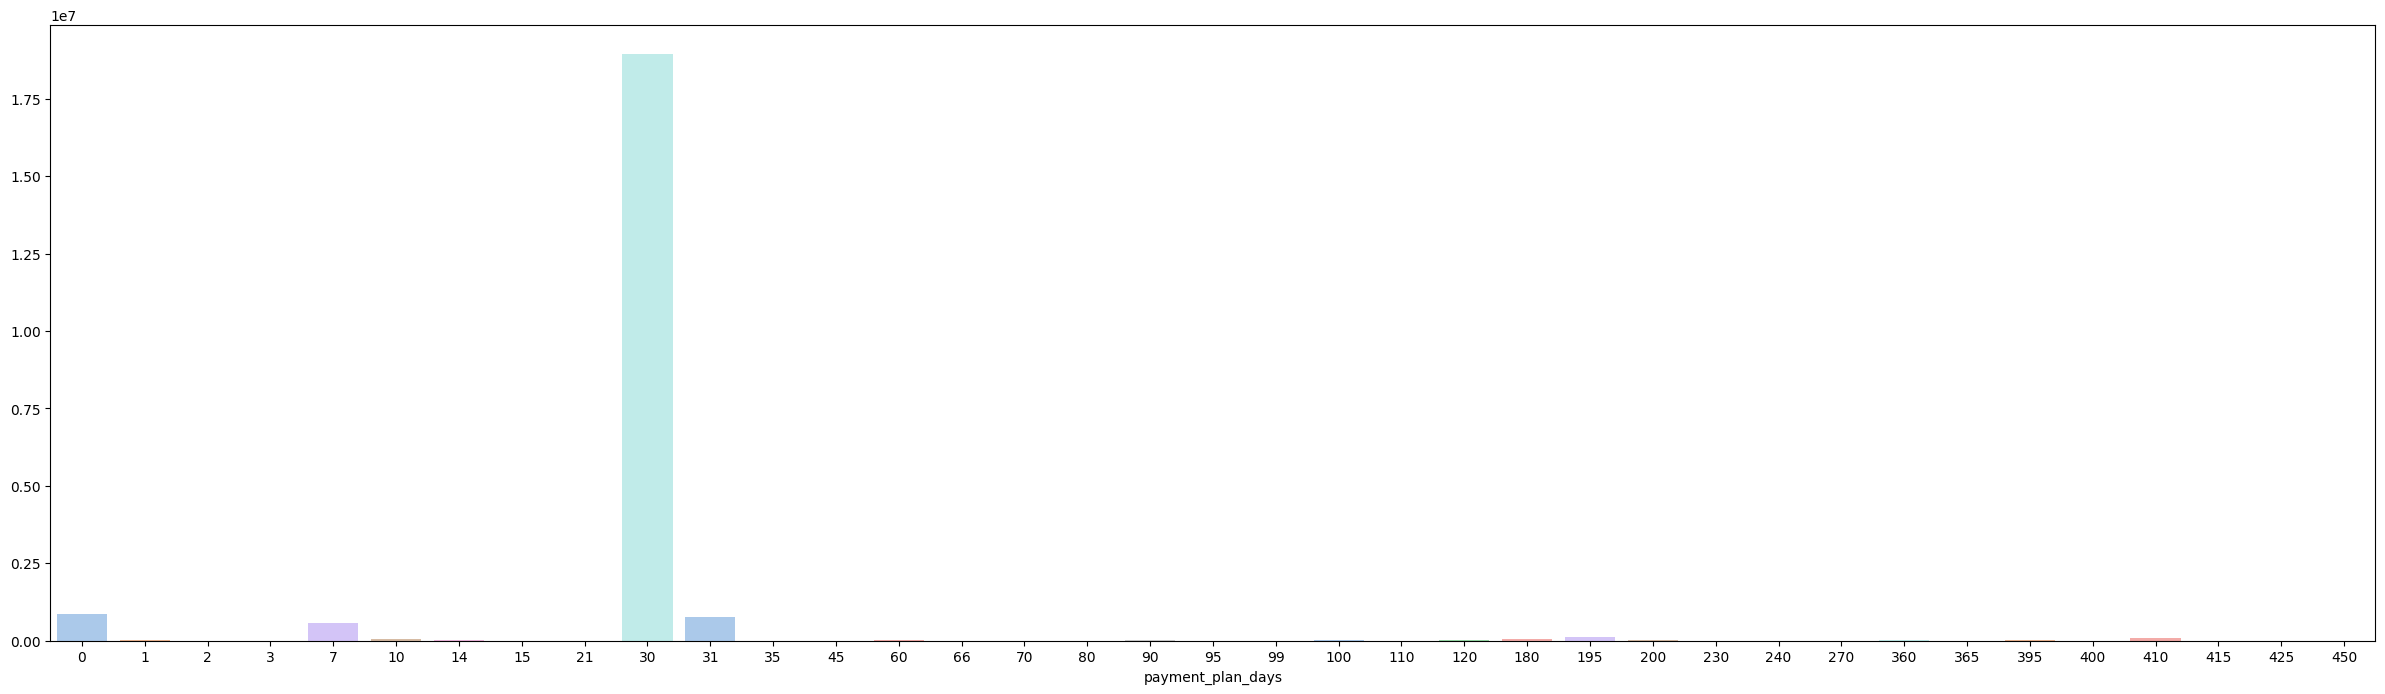

Column : is_auto_renew


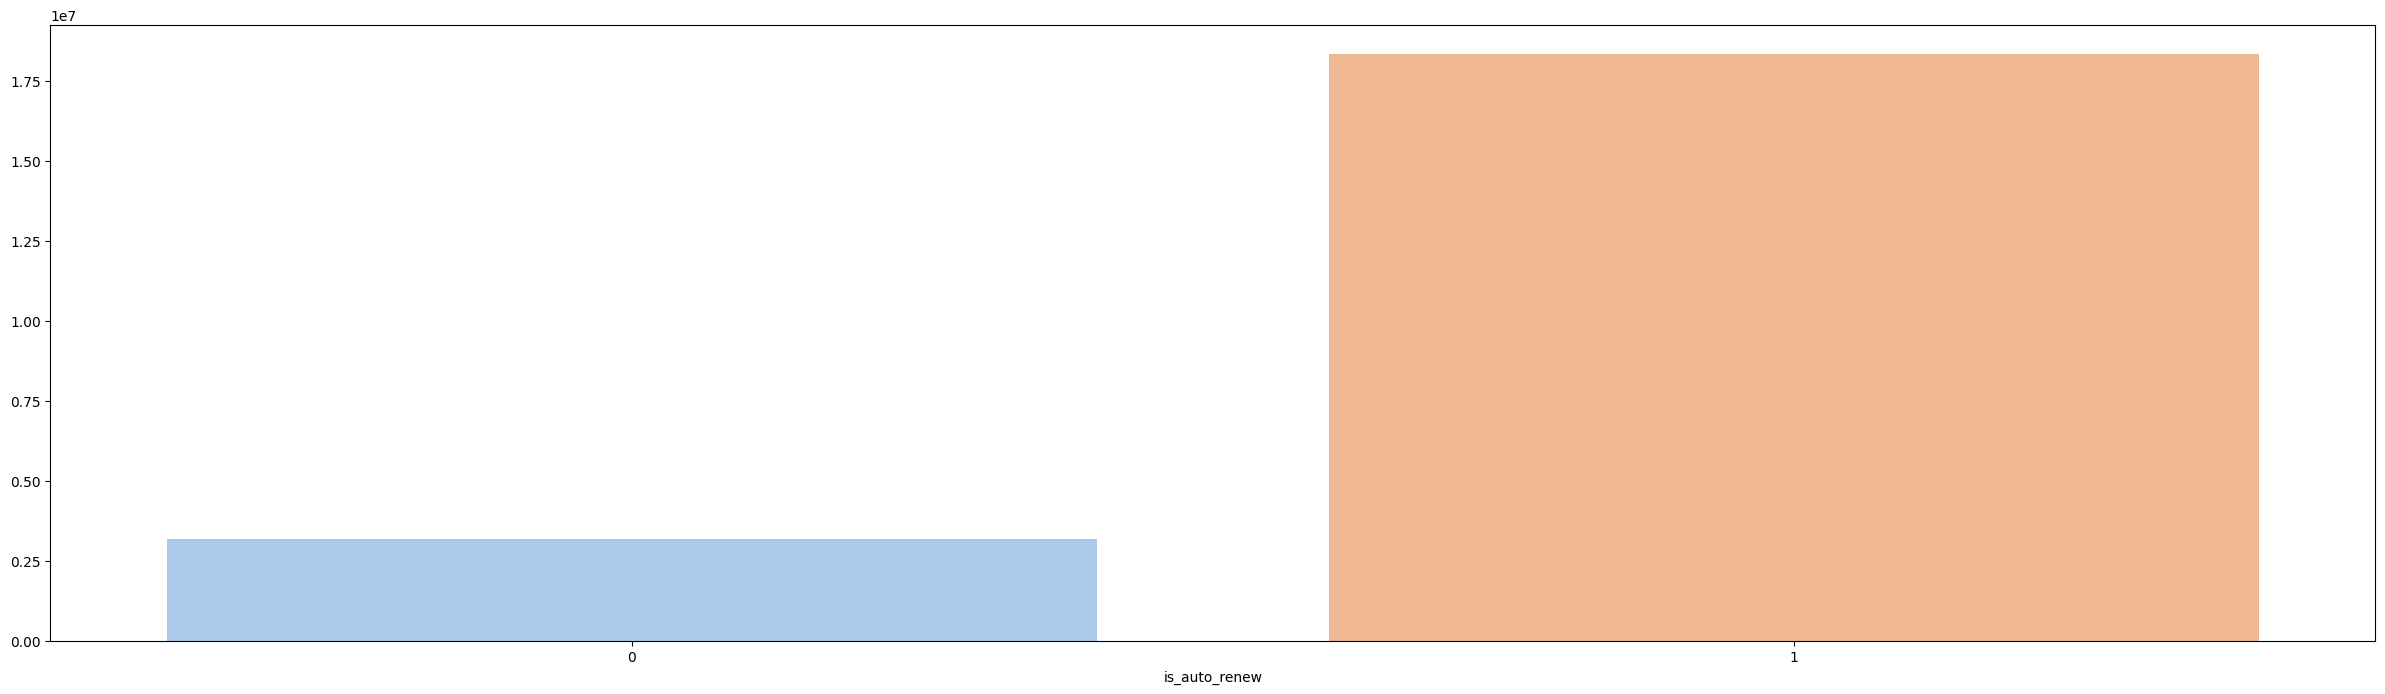

Column : is_cancel


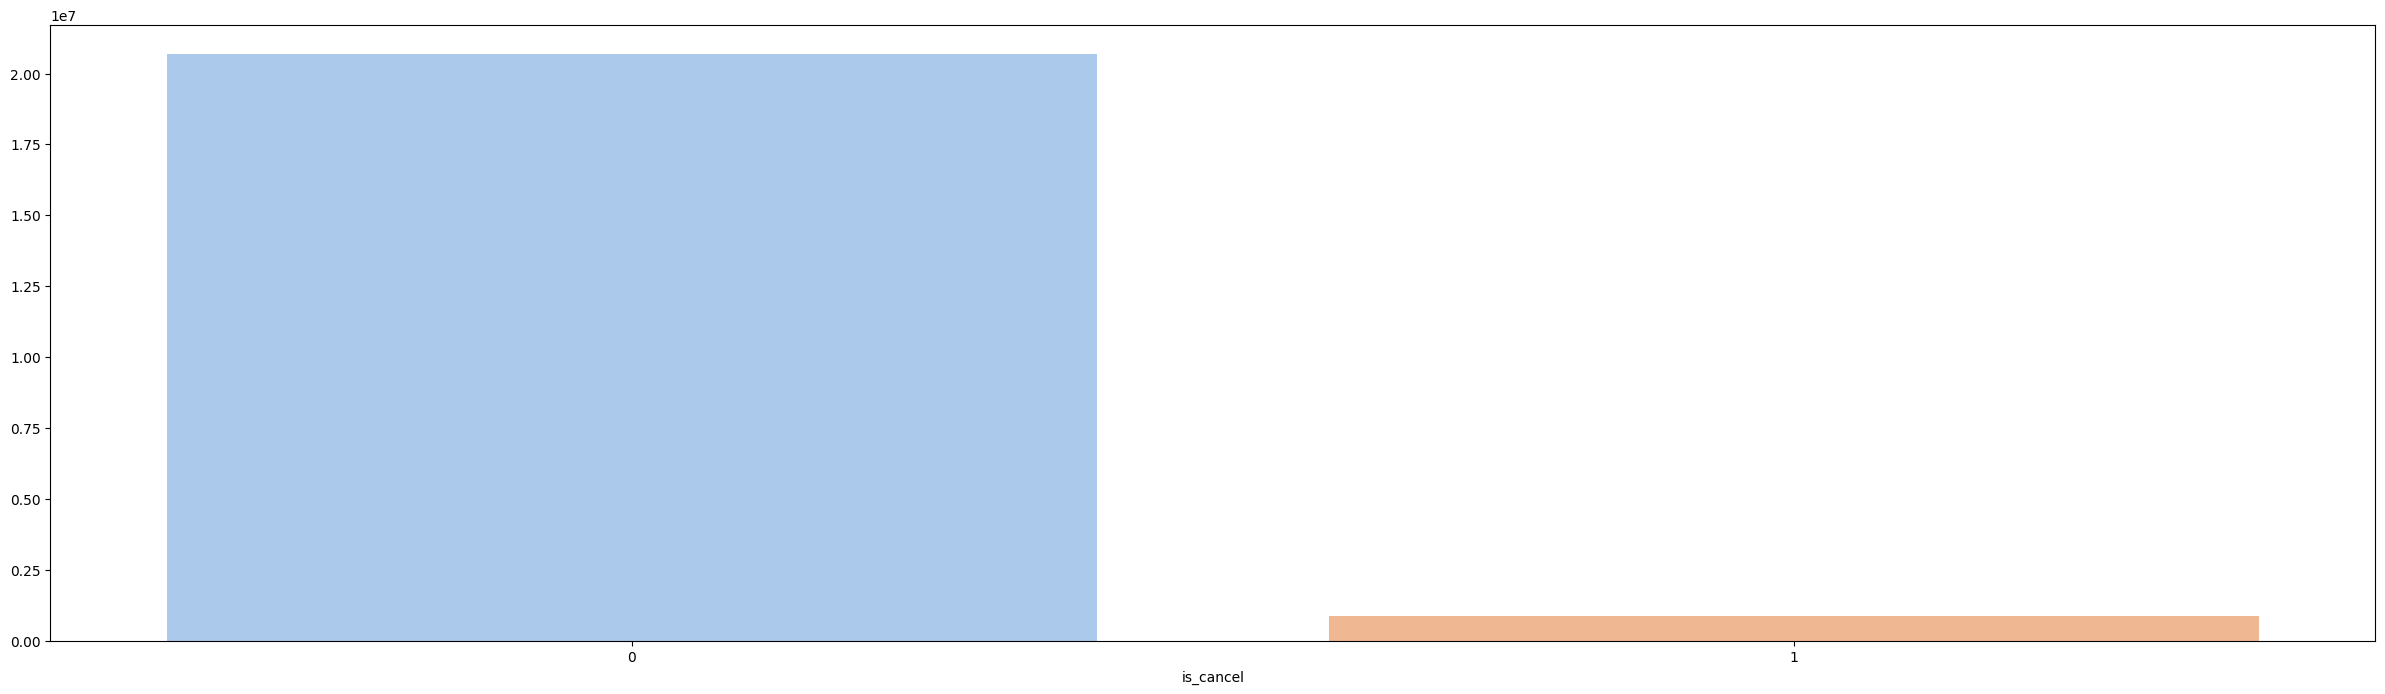

Column : plan_list_price


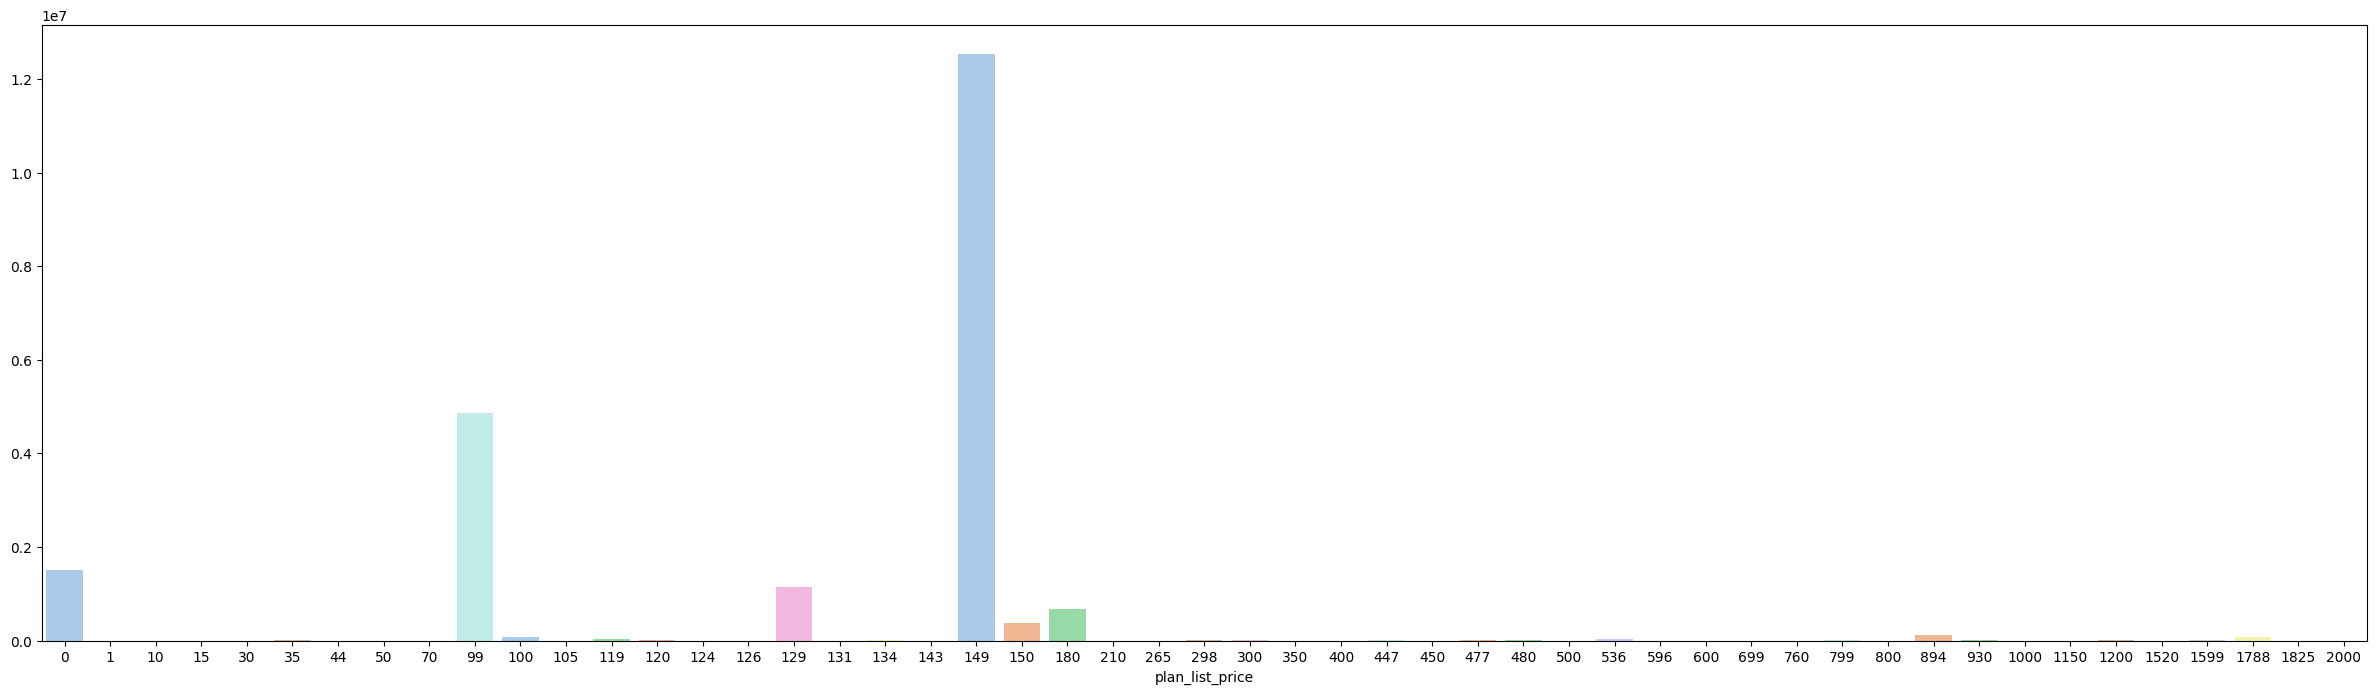

Column : actual_amount_paid


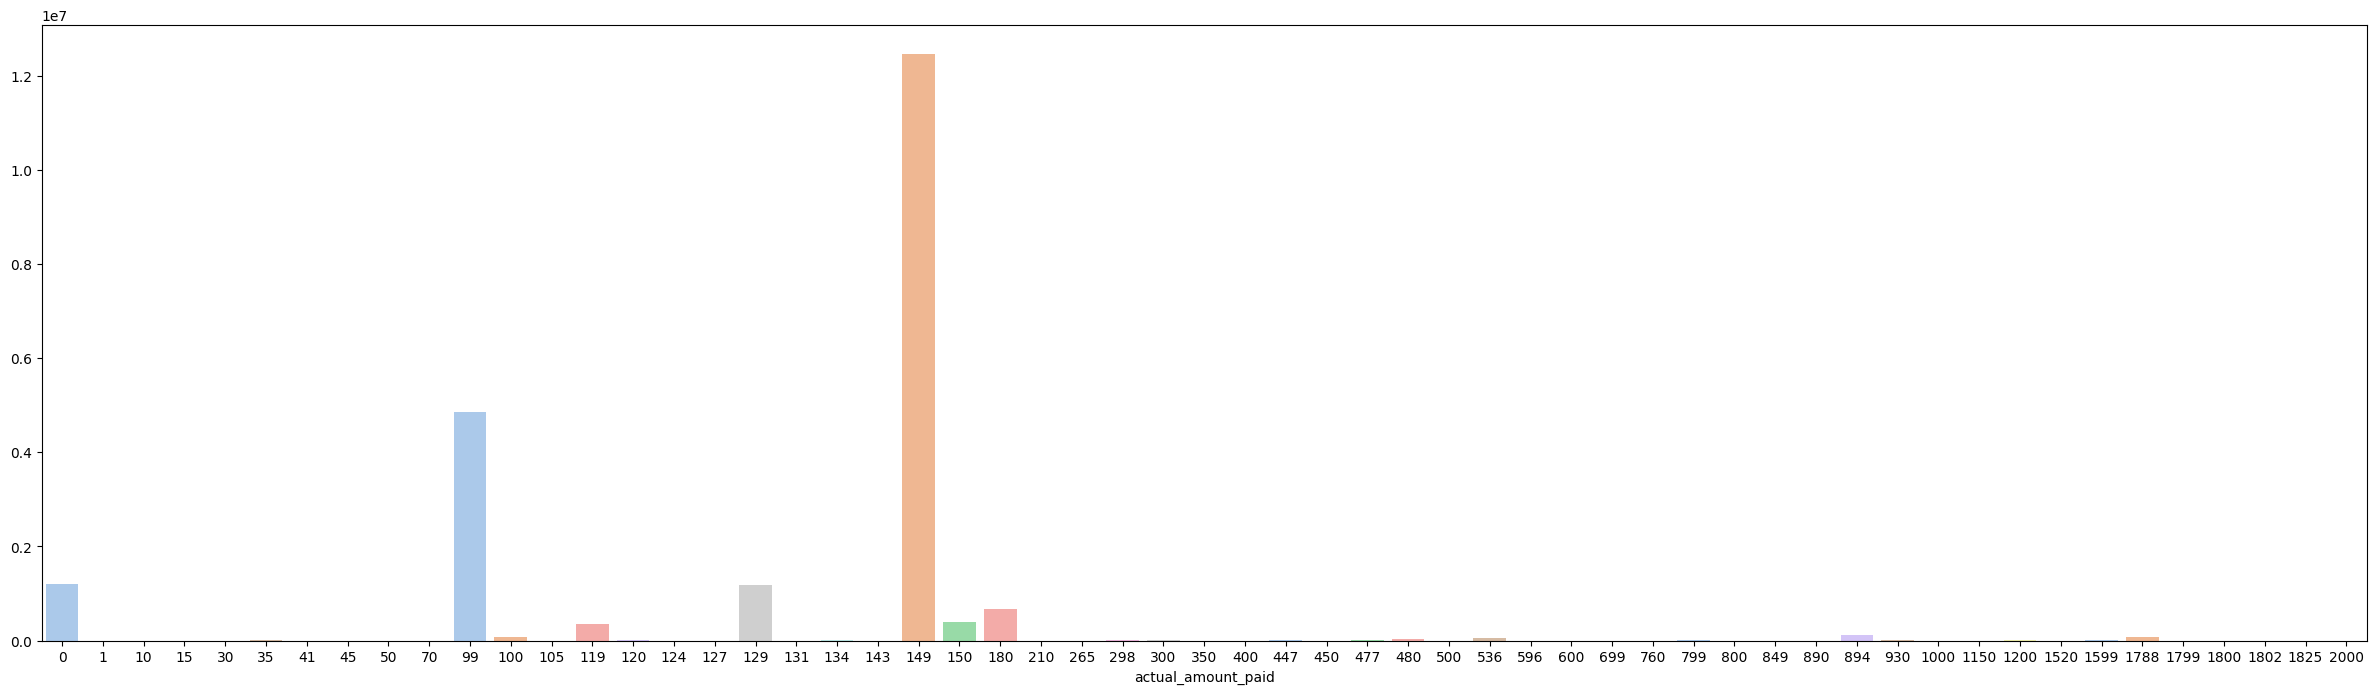

In [284]:
transactions = transaction_df.compute()
for each_column in [
        'payment_method_id', 'payment_plan_days',
        'is_auto_renew','is_cancel',
        'plan_list_price','actual_amount_paid'
    ]:
    print(f"Column : {each_column}")
    plt.figure(figsize=(30, 8))
    data_counts = transactions[each_column].value_counts()
    sns.barplot(
        x=data_counts.index,
        y=data_counts.values,
        hue=data_counts.index,
        palette="pastel",
        legend=False
    )
    plt.show()

planned vs actual paid


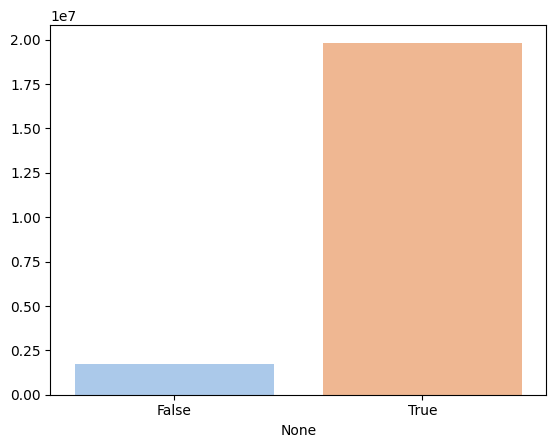

In [241]:
print(f"planned vs actual paid")
planned_vs_actual = (
    transaction_df.plan_list_price == transaction_df.actual_amount_paid
).compute().value_counts()

sns.barplot(
    x=planned_vs_actual.index,
    y=planned_vs_actual.values,
    hue=planned_vs_actual.index,
    palette="pastel",
    legend=False
)
plt.show()

In [275]:
planned_vs_actual_df = planned_vs_actual.reset_index(name='count')
total_count = planned_vs_actual_df['count'].sum()
print(total_count)
display(planned_vs_actual_df.groupby('index')['count'].apply(lambda x: 100*x/total_count))
# planned_vs_actual_df[planned_vs_actual_df['index']==True]/total_count

21547746


index   
False  1     7.958155
True   0    92.041845
Name: count, dtype: float64

In [279]:
planned_vs_actual_diff = (
    transaction_df.plan_list_price - transaction_df.actual_amount_paid
)
planned_vs_actual_diff_counts = planned_vs_actual_diff[planned_vs_actual_diff!=0].compute().value_counts()

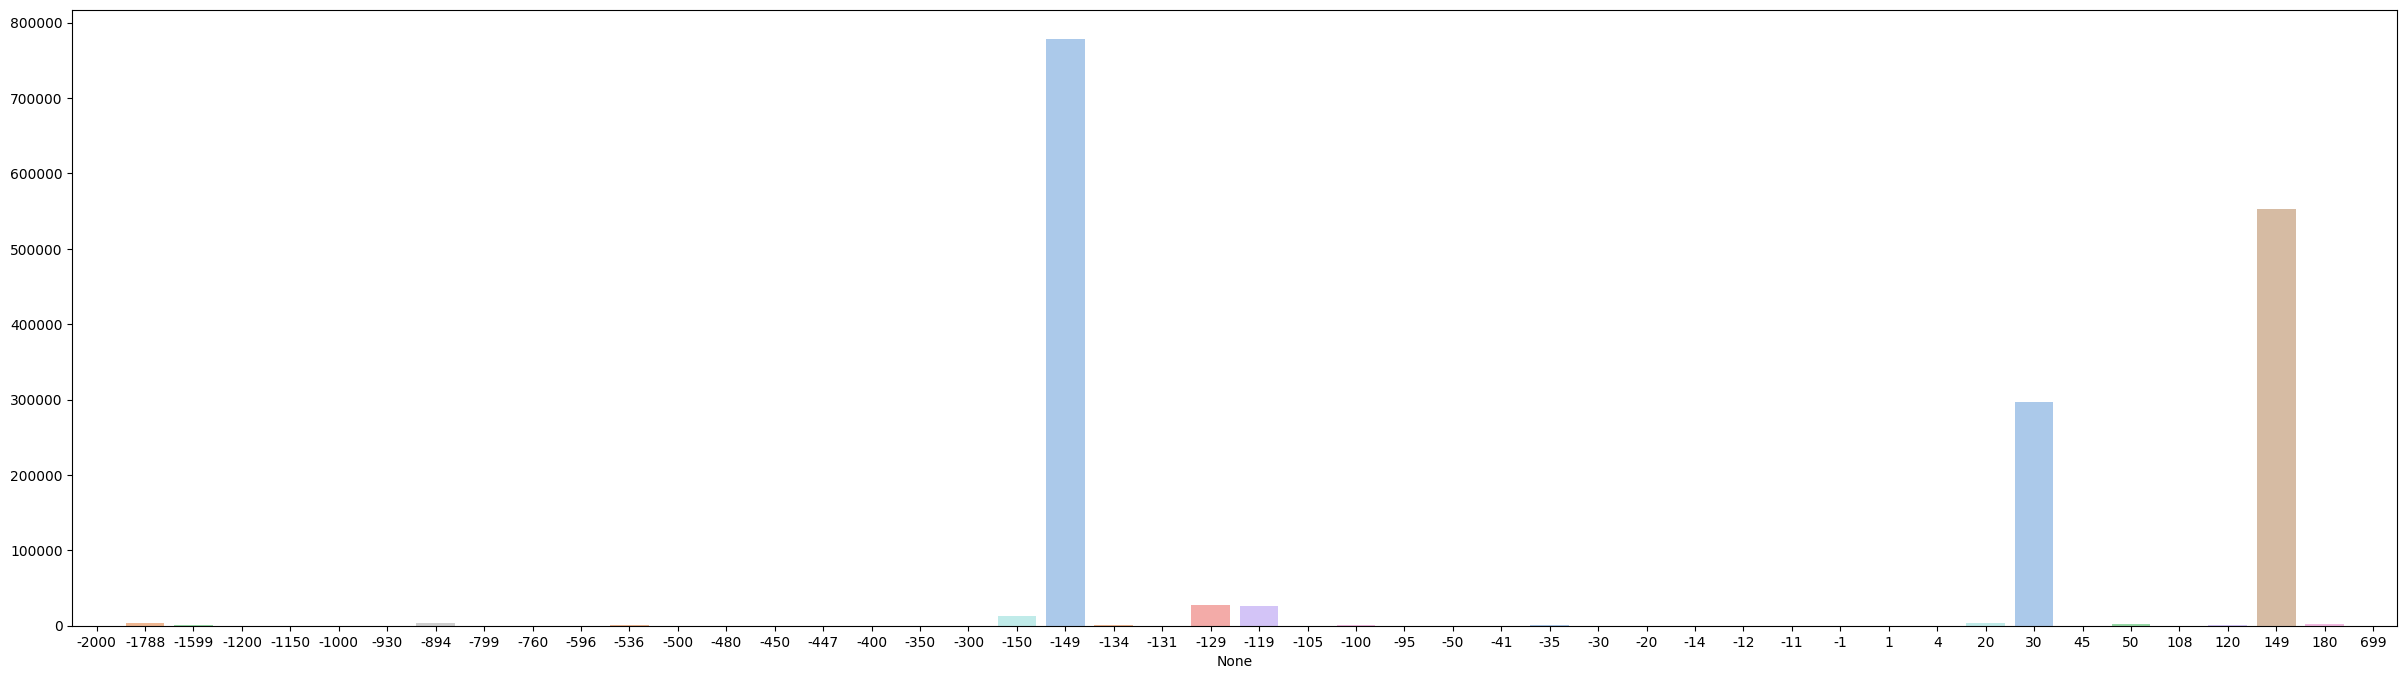

In [283]:
plt.figure(figsize=(30, 8))
sns.barplot(
    x=planned_vs_actual_diff_counts.index,
    y=planned_vs_actual_diff_counts.values,
    hue=planned_vs_actual_diff_counts.index,
    palette="pastel",
    legend=False
)
plt.show()

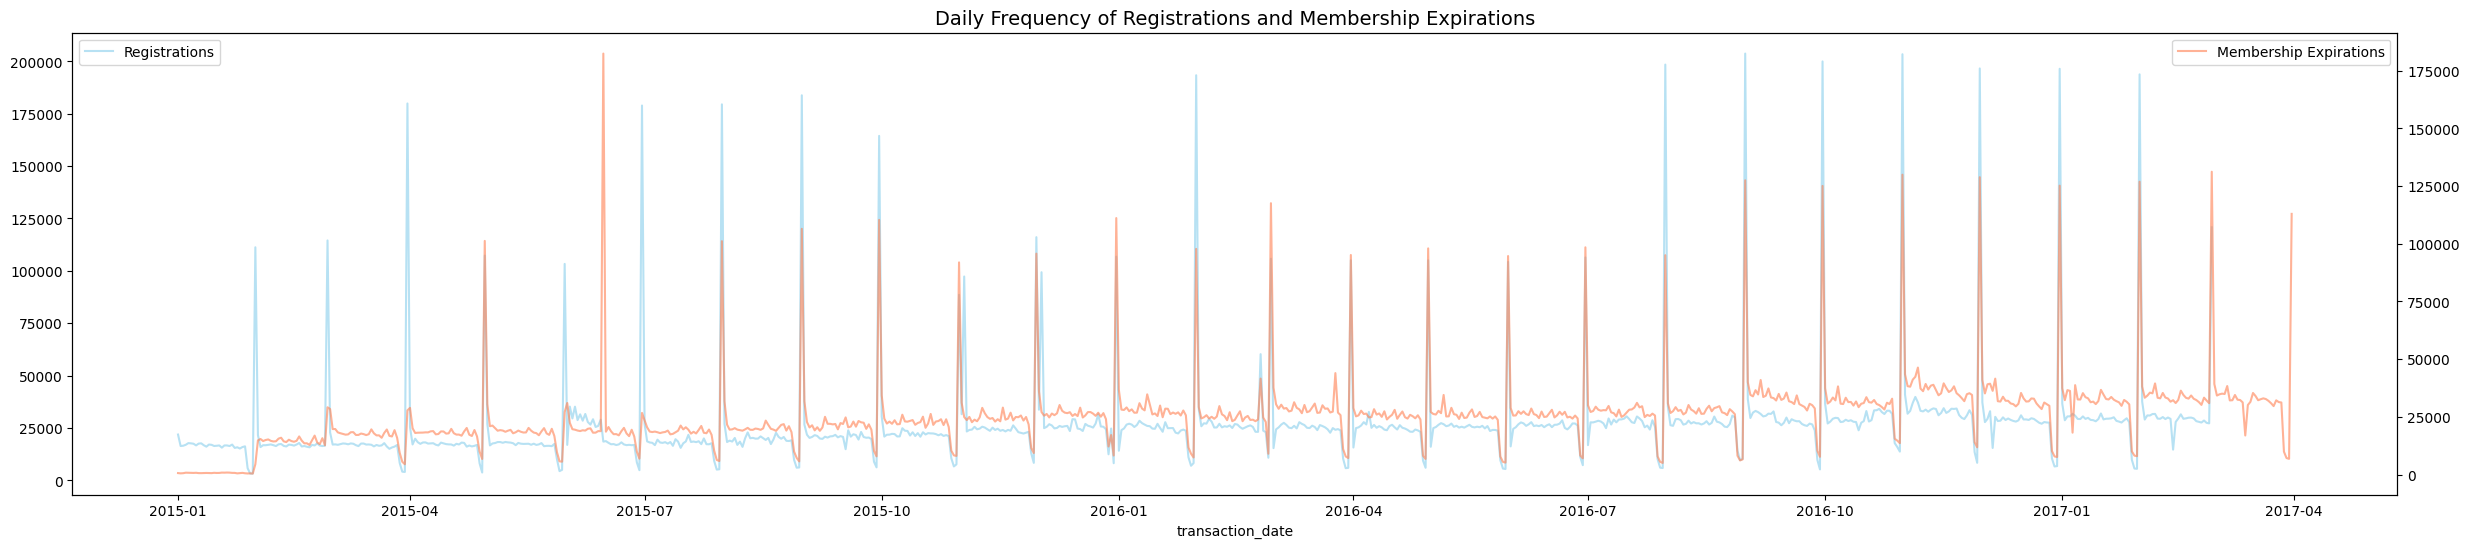

In [289]:
# Resample daily and count occurrences
daily_counts =transaction_df.transaction_date.dt.date.value_counts().compute()
daily_counts_expiration =transaction_df[
        (transaction_df.membership_expire_date>='2015-01-01')
    ].membership_expire_date.dt.date.value_counts().compute()

fig, ax1 = plt.subplots(figsize=(30, 6))
# Plot the first data
sns.lineplot(
    x=daily_counts.index,
    y=daily_counts.values,
    ax=ax1,
    label='Registrations',
    color='skyblue',
    alpha=0.6
)
# Create a twin axis for the second dataset
ax2 = ax1.twinx()
# Plot the second data
sns.lineplot(
    x=daily_counts_expiration.index,
    y=daily_counts_expiration.values, 
    ax=ax2, 
    label='Membership Expirations',
    color='coral',
    alpha=0.6
)
# Add titles and labels
plt.title("Daily Frequency of Registrations and Membership Expirations", fontsize=14)

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

[]

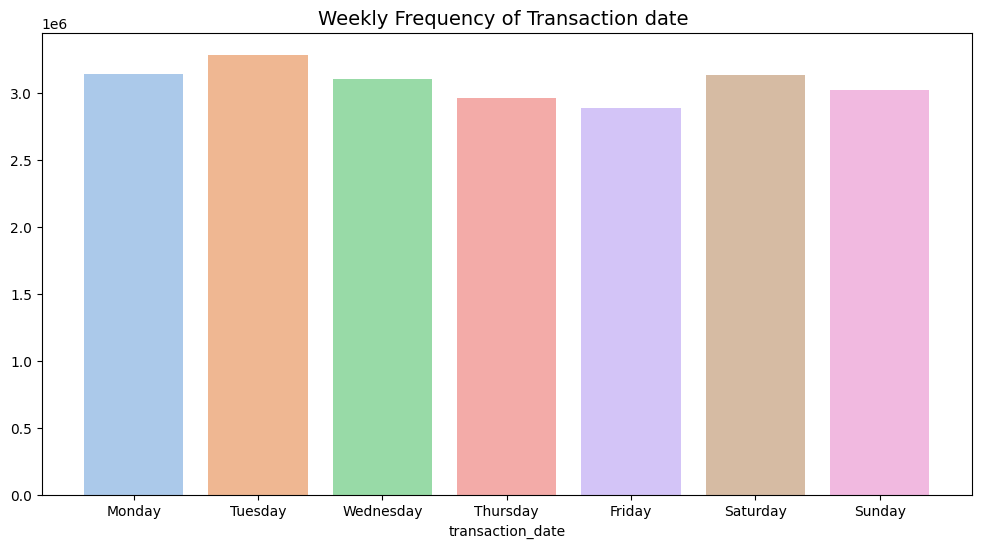

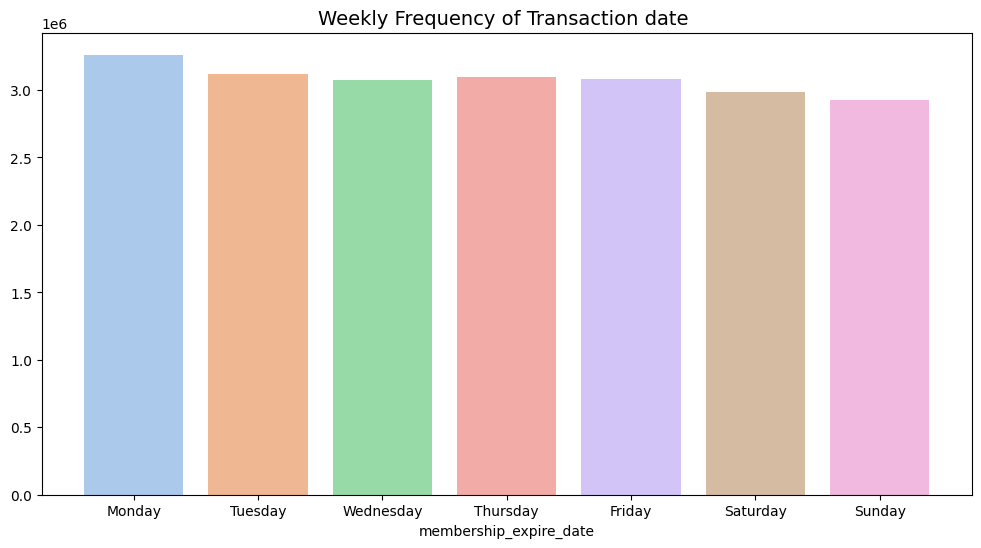

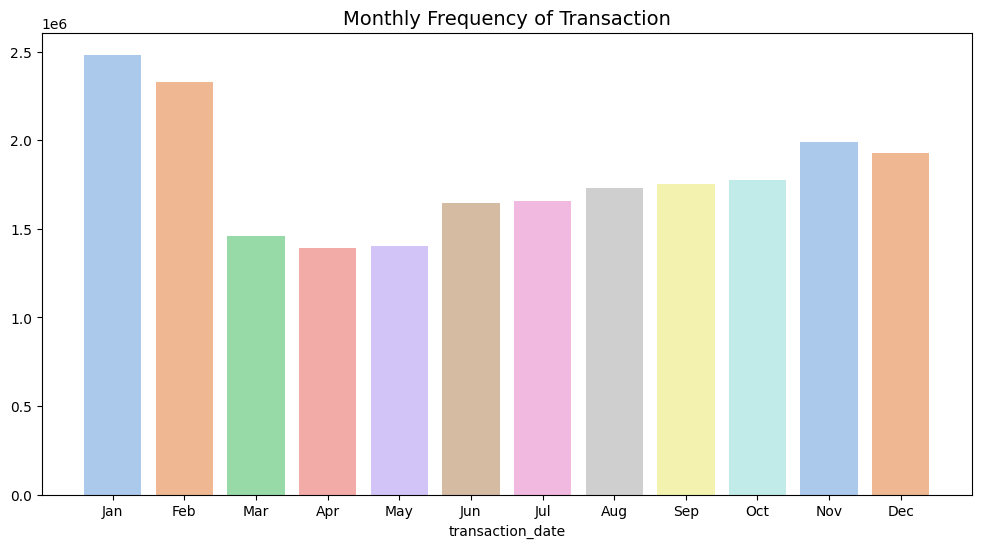

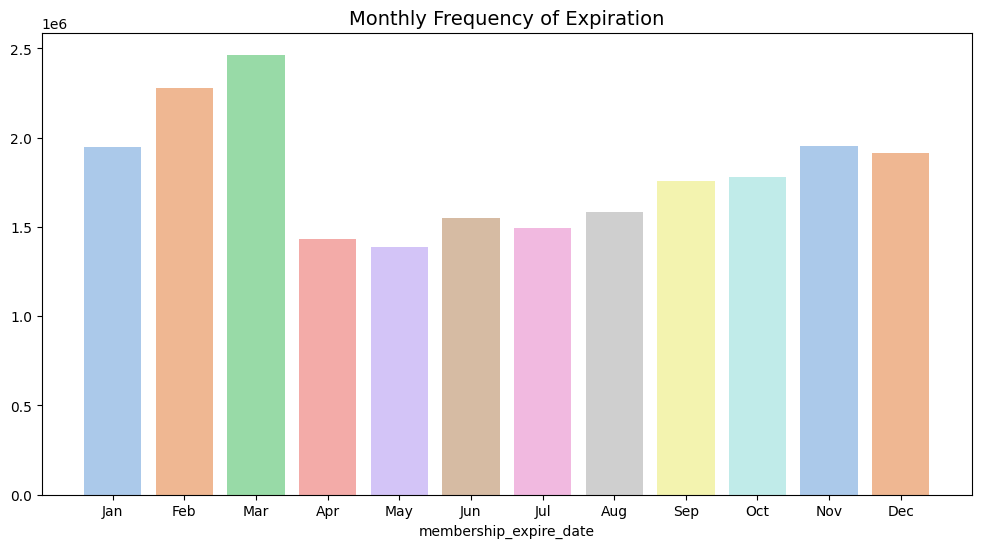

In [291]:

# daily_counts =transaction_df.transaction_date.dt.date.value_counts().compute()
# daily_counts_expiration =transaction_df[
#         (transaction_df.membership_expire_date>='2015-01-01')
#     ].membership_expire_date.dt.date.value_counts().compute()


# Resample daily and count occurrences
weekly_counts = transaction_df.transaction_date.dt.weekday.value_counts().compute()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=weekly_counts.index,
    y=weekly_counts.values,
    hue=weekly_counts.index,
    palette="pastel",
    # alpha=0.6
    legend=False
)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Weekly Frequency of Transaction date ", fontsize=14)
plt.plot()

######
weekly_counts = transaction_df[
        (transaction_df.membership_expire_date>='2015-01-01')
    ].membership_expire_date.dt.weekday.value_counts().compute()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=weekly_counts.index,
    y=weekly_counts.values,
    hue=weekly_counts.index,
    palette="pastel",
    # alpha=0.6
    legend=False
)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Weekly Frequency of Transaction date ", fontsize=14)
plt.plot()


# Monthly
monthly_counts = transaction_df.transaction_date.dt.month.value_counts().compute()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=monthly_counts.index,
    y=monthly_counts.values,
    hue=monthly_counts.index,
    palette="pastel",
    # alpha=0.6
    legend=False
)
plt.xticks(
    list(range(12)), 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
)
plt.title("Monthly Frequency of Transaction", fontsize=14)
plt.plot()

####

monthly_counts = transaction_df[
        (transaction_df.membership_expire_date>='2015-01-01')
    ].membership_expire_date.dt.month.value_counts().compute()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=monthly_counts.index,
    y=monthly_counts.values,
    hue=monthly_counts.index,
    palette="pastel",
    # alpha=0.6
    legend=False
)
plt.xticks(
    list(range(12)), 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
)
plt.title("Monthly Frequency of Expiration", fontsize=14)
plt.plot()


## categorical
'payment_method_id', 

'payment_plan_days', 

'is_auto_renew',
'is_cancel'

'plan_list_price',
'actual_amount_paid',

## numerical
'transaction_date',
'membership_expire_date', 



- paymemnt method , 41 seems like the most prefered way of payment, followed by
33-40 payment methods.
- payment plan days, most common plan is of 30 days
- most of the transactinos have is auto renew on
- very few transactions have cancelation

- price of plans , most common is the plan of 149, followed by 99. then 129, 150 and 180
there are few with 0 plan price
- actual amount paid has almost the same distribution as plan price list
there is also significant count at 119


- 92% of the transaction have same amount paid as planned while 8% have a diffrent price
- in the diffrence graph significant no is at 149 and - 149, folloed by 30 and then -129 and -119

- in the registration and membership expiration graph
both timeseries are almost similar.
except for few places where spikes are misalignied.
- there is a dip before the monthly epiration/renewal spike.
- before 2016 registration spike is bigger then expiration. in 2016 expiration spike seems to be bigger then registation.


-transactions are mostly done on mon tues wed and sat
- membership expires mostly on monday

- monthly transaction trends shows transaction count increases from lowest in march to nov -dec highest being in jan-feb
- monthly expiration trend shows lowest expiration in apr- may then it increases from jun to march
march being the month of highest expiration.

Note:
- when using sns plot dont use in built function ,
compute using dask and then return the computed value. works way faster
and better on memory
- use gc.collect() to clean memory when required.
- have ram monitor in view. just incase you see unexpected spike that can crash your system

In [ ]:
# gc.collect()

13560

### 2.3 User Log  

user log file size is about 27 gb in uncompressed form. we are taking only about 0.25% of this data still 5 million rows).
this file has information about users listening behaviour 

In [292]:
user_log_df_sample.columns

Index(['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs'],
      dtype='object')

no of songs for each of the bin
unique songs
total sec distribution
no of entries per user distribution
    monthly listening


[]

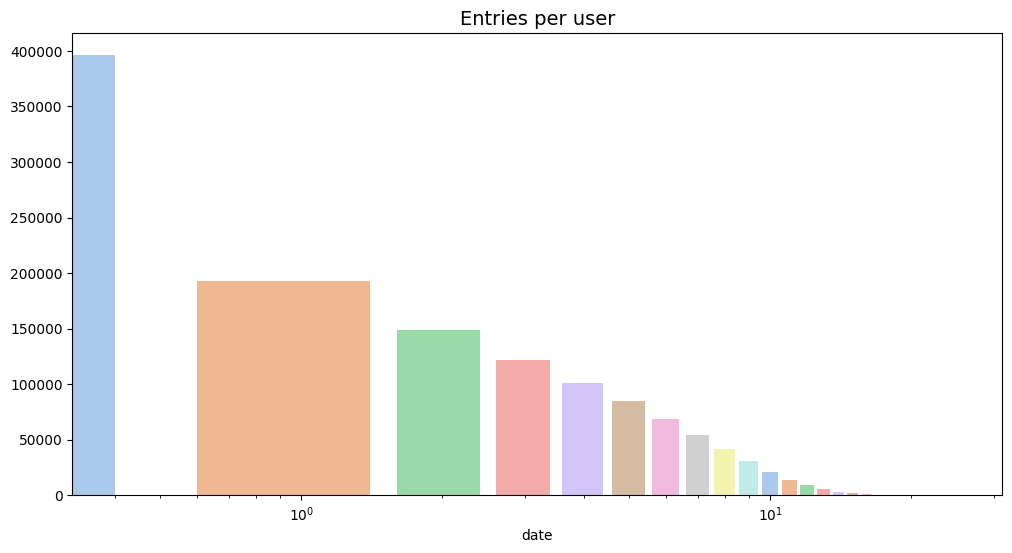

In [309]:
user_entries_count = user_log_df_sample.groupby('msno').date.count().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=user_entries_count.index,
    y=user_entries_count.values,
    hue=user_entries_count.index,
    palette="pastel",
    # alpha=0.6
    legend=False
)
plt.xscale('log')
plt.title("Entries per user", fontsize=14)
plt.plot()

[]

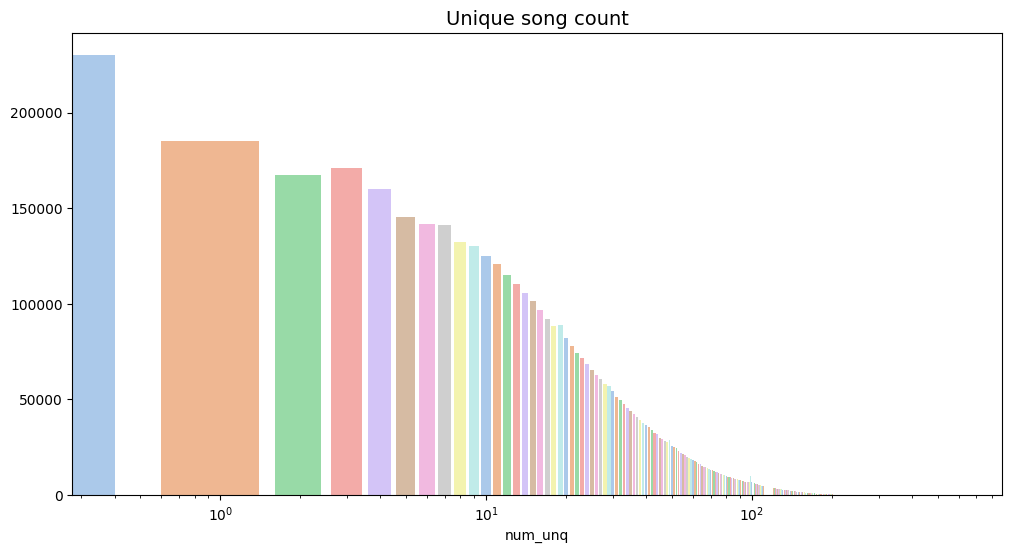

In [308]:
song_count = user_log_df_sample.num_unq.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=song_count.index,
    y=song_count.values,
    hue=song_count.index,
    palette="pastel",
    # alpha=0.6
    legend=False
)
plt.xscale('log')
plt.title("Unique song count", fontsize=14)
plt.plot()

In [304]:
user_log_df_sample.total_secs.min()

-9223372036854582.0

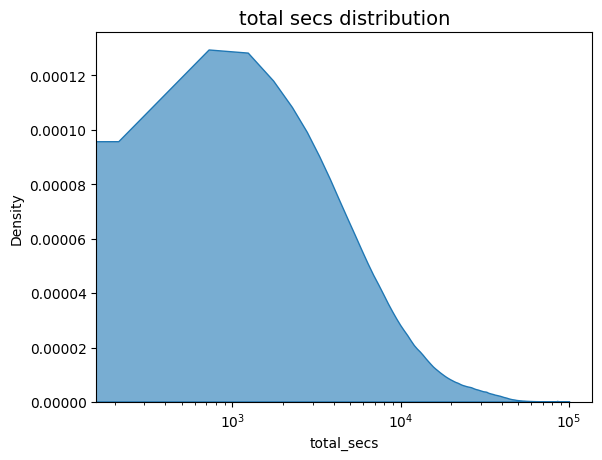

In [312]:
# sns.kdeplot(    
#     data=user_log_df_sample,
#     x='total_secs',    
#     # fill=True,
#     # warn_singular=False,  # Suppress the warning
#     legend=False,
#     alpha=0.6,  # Transparency for better overlay visibility
# )
total_secs_dist = abs(user_log_df_sample[(abs(user_log_df_sample.total_secs)<1e5)].total_secs).reset_index(name='total_secs')
sns.kdeplot(
    data=total_secs_dist,
    # data=user_log_df_sample,
    x='total_secs',
    fill=True,
    warn_singular=False,  # Suppress the warning
    legend=False,
    alpha=0.6,  # Transparency for better overlay visibility
)
plt.xscale('log')
plt.title("total secs distribution", fontsize=14)
plt.show()

In [ ]:
import numpy as np

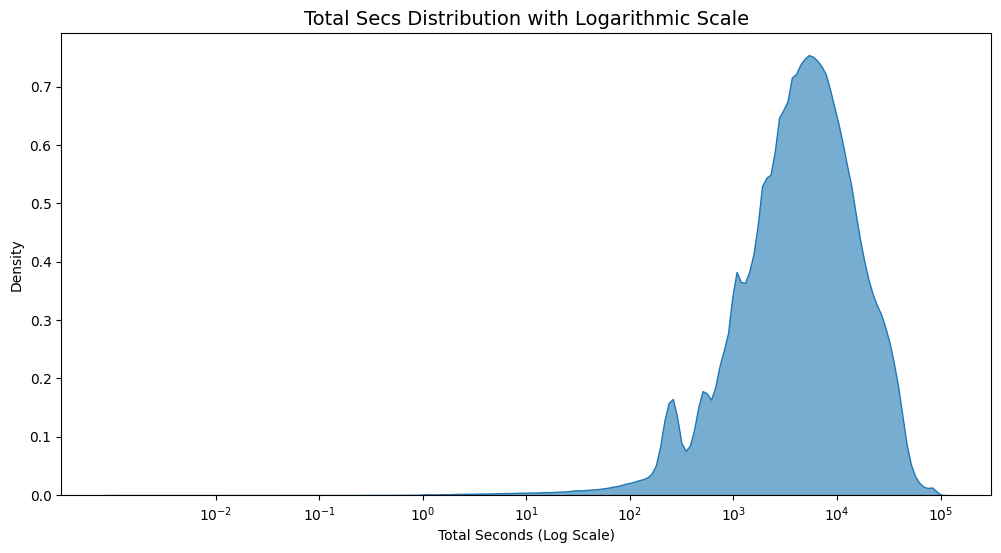

In [319]:
# Filter out non-positive and extreme values
filtered_data = user_log_df_sample[
    (user_log_df_sample.total_secs > 0) & (user_log_df_sample.total_secs < 1e5)
].total_secs

# Apply log transformation to the data
log_transformed_data = np.log10(filtered_data)

# Create the KDE plot
plt.figure(figsize=(12, 6))

sns.kdeplot(
    data=log_transformed_data,
    fill=True,
    warn_singular=False,
    legend=False,
    alpha=0.6  # Transparency for better visibility
)

# Adjust the x-axis to show log-transformed values as powers of 10
plt.xticks(
    ticks=np.arange(-2, 6),  # Range of exponents to display (e.g., 10^-2 to 10^5)
    labels=[f'$10^{{{i}}}$' for i in range(-2, 6)]
)

# Add labels and title
plt.xlabel("Total Seconds (Log Scale)")
plt.ylabel("Density")
plt.title("Total Secs Distribution with Logarithmic Scale", fontsize=14)

plt.show()


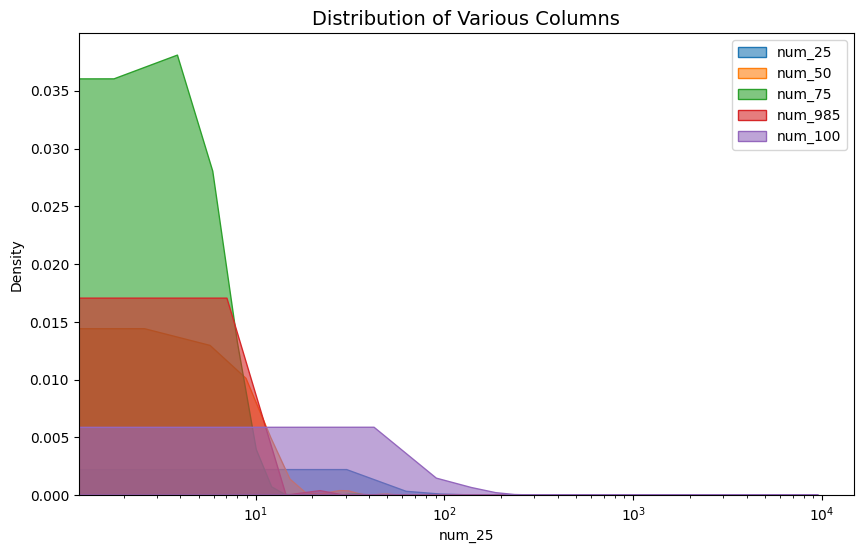

In [306]:
plt.figure(figsize=(10, 6))

# Iterate over the columns and plot KDE for each
columns = ['num_25', 'num_50', 'num_75', 'num_985', 'num_100']

for col in columns:
    sns.kdeplot(
        data=user_log_df_sample,
        x=col,
        linewidth=1,
        fill=True,
        warn_singular=False,
        legend=False,
        alpha=0.6,
        label=col
    )

plt.title("Distribution of Various Columns", fontsize=14)
plt.xscale('log')
plt.legend()
plt.show()

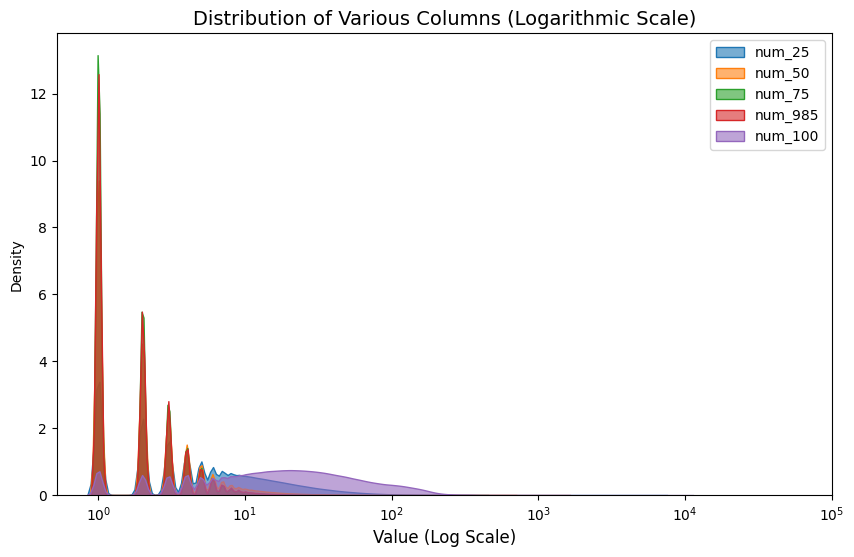

In [321]:
plt.figure(figsize=(10, 6))

# Columns to plot
columns = ['num_25', 'num_50', 'num_75', 'num_985', 'num_100']

# Iterate over the columns and plot KDE for each
for col in columns:
    # Filter out non-positive values to avoid issues with log scale
    filtered_data = user_log_df_sample[user_log_df_sample[col] > 0][col]
    
    # Apply log transformation for better visualization
    log_transformed_data = np.log10(filtered_data)

    sns.kdeplot(
        data=log_transformed_data,
        linewidth=1,
        fill=True,
        warn_singular=False,
        legend=False,
        alpha=0.6,
        label=col
    )

# Adjust x-axis to display as powers of 10
plt.xticks(
    ticks=np.arange(0, 6),  # Define the range of exponents
    labels=[f'$10^{{{i}}}$' for i in range(0, 6)]  # Custom tick labels
)

plt.xlabel("Value (Log Scale)", fontsize=12)
plt.title("Distribution of Various Columns (Logarithmic Scale)", fontsize=14)
plt.legend()
plt.show()

[]

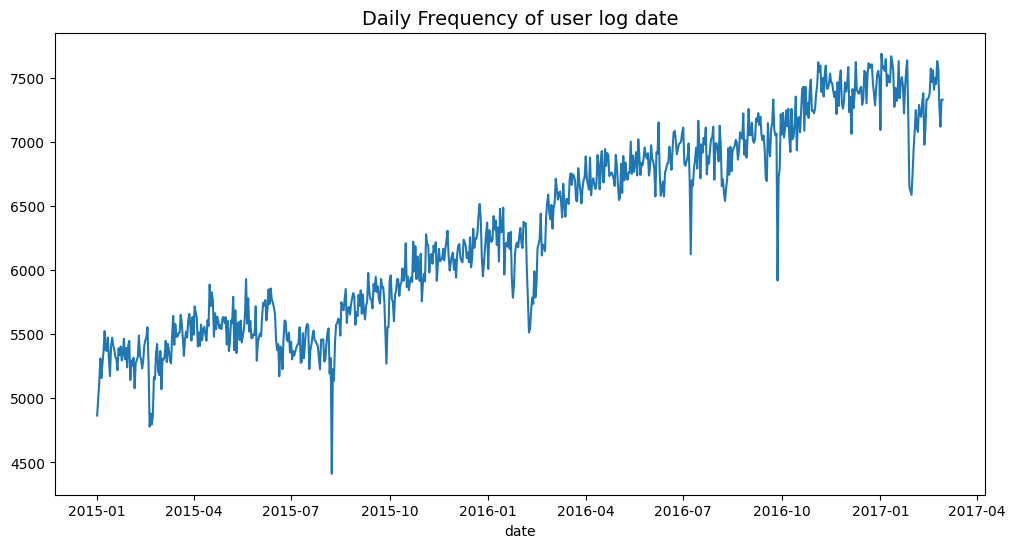

In [323]:
# Resample daily and count occurrences
daily_counts =user_log_df_sample.date.dt.date.value_counts()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=daily_counts.index,
    y=daily_counts.values,
    # color="skyblue",
    # alpha=0.6
)

plt.title("Daily Frequency of user log date", fontsize=14)
plt.plot()

[]

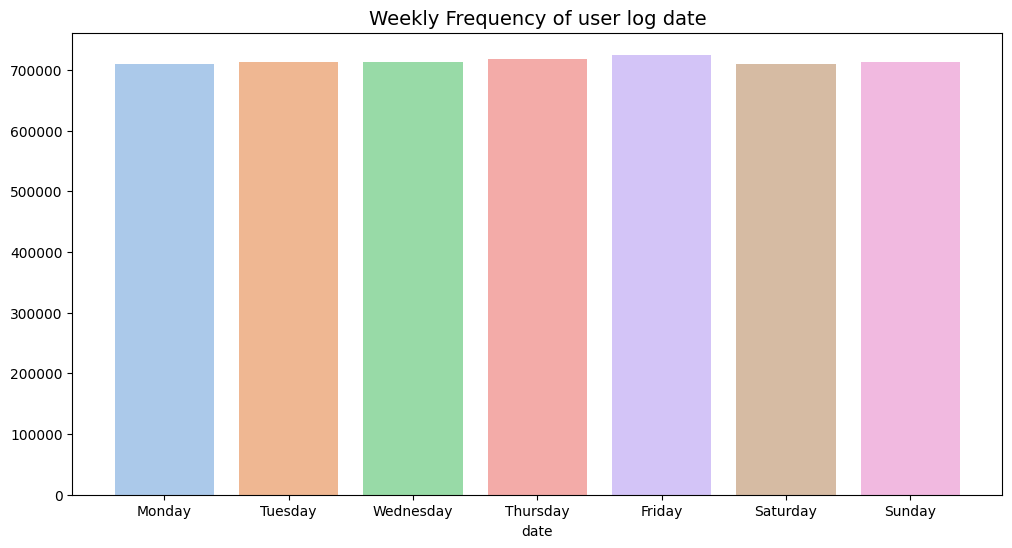

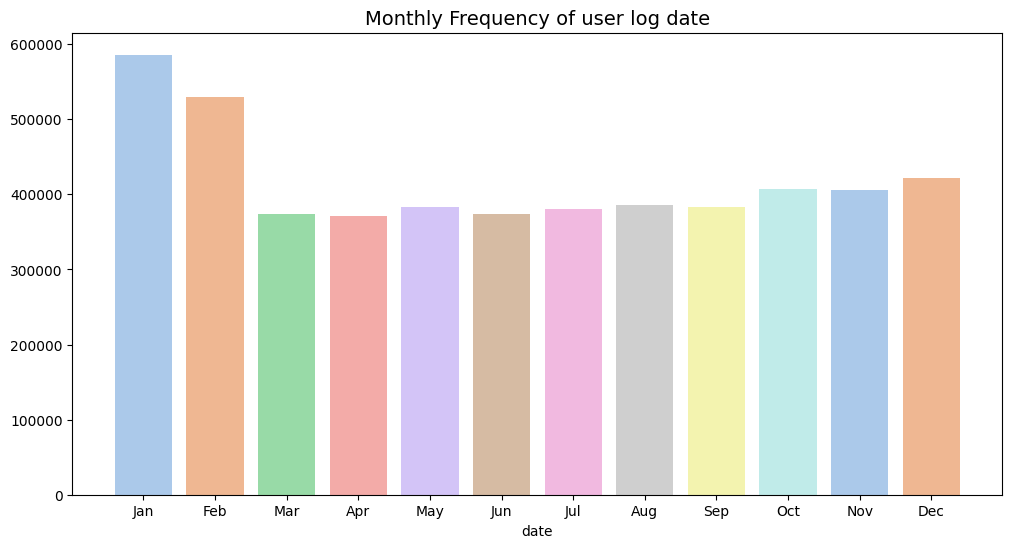

In [324]:
# Resample daily and count occurrences
weekly_counts = user_log_df_sample.date.dt.weekday.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=weekly_counts.index,
    y=weekly_counts.values,
    hue=weekly_counts.index,
    palette="pastel",
    # alpha=0.6
    legend=False
)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Weekly Frequency of user log date", fontsize=14)
plt.plot()



# Resample daily and count occurrences
monthly_counts = user_log_df_sample.date.dt.month.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=monthly_counts.index,
    y=monthly_counts.values,
    hue=monthly_counts.index,
    palette="pastel",
    # alpha=0.6
    legend=False
)
plt.xticks(
    list(range(12)), 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
)
plt.title("Monthly Frequency of user log date", fontsize=14)
plt.plot()


...

## 3. Dataset Relationships (Bivariate Analysis)  


### 3.1 Churn Rate  

#### 3.1.1 Members Dataset  

#### 3.1.2 Users Logs Dataset  

#### 3.1.3 Transactions Dataset  

## 4. Data Cleaning  


## 5. Multi-Feature Relationships (Multivariate Analysis)

"""
### Input
#### USERLOG
    - msno
    - date
    - num_25
    - num_50  
    - num_75
    - num_985
    - num_100
    - num_unq
    - total_secs
#### MEMBERS
    - msno
    - city
    - bd
    - gender
    - registered_via
    - registration_init_time
#### TRANSACTION
    - msno  
    - payment_method_id
    - payment_plan_days
    - plan_list_price
    - actual_amount_paid
    - is_auto_renew
    - transaction_date
    - membership_expire_date
    - is_cancel
### patterns
- useage can show sign of churn
- user segment can tell seasonal changes (only for 2 months wont have data for this)
- % of new users convert
- payment method -> segment -> can afford or not
- default option, subscription, auto renew, 


### hypothesis
in user listening patterns
lets consider divide based on listening sec (low, medium, high)
in addition we can have distribution in users listening pattern as low and high numbers in songs listend less then 25% , songs listend 25-75% and songs listened more than 75%
and combination of 0-75, 25-100, or just mean.
i hypothesis that when person is enjoying he will have lot of songs in above 75%, 
when he doesnt like songs he will rapidly change below 25%, on avg he will move around 50-75,but will have few on above 75 and few below 25 . thats ideal.
as you are dissatisfied you will start using it lesser.
or you will start using it too much before leaving

city, gender, bd, registerd via
- city based profiles where some heavy users
- females will be using lesser than man
- 18-25 most listener, then 25-30 then lesser in all other location
- possible old age also has higher listening pattern than 25-30
- registered via will also show diffrent profiles of useage


### eda skeleton
- churn analysis
- filter the users and check their activity
- filtered out users activity
- based on city, gender, age, registered via churn rate
- subscriber pattern in transaction wrt churn rate

- clustering of diffrent types of users activity
- usage pattern with churn rate 

- figure out which are the main features
- model the features 
- iterate to get better modeling result
- ready for deployment


### eda
- data loading and initial inspection
- target variable analysis
- user demographics
- subscription behaviour analysis
- listening behaviour analysis
- churn trends
- data cleaning and feature engineering


segment users based on demographics
cluster listening pattern
for a given user, and given pattern so x is the pattern of churn
before pattern after pattern change

### 
can build big table and train a transformer
need to observe and identify bigger and smaller patterns and amplify them to same level and give them conversion rate
"""

train data
- subscription expires within the month of february 2017
- user churn/ renewal in month of march 2017
test data
- subscription expires within the month of march 2017
- user churn/ renewal in month of april 2017



### Data loading and initial inspection

### Target variable analysis

In [18]:
global_churn_rate = train_df[train_df['is_churn']==1].is_churn.count().compute()*100/rows
print()
print(f"Global churn rate: {global_churn_rate:.2f}")


Global churn rate: 6.39


### User demographics

### Subscription behaviour analysis


### Churn trends

### Listening behaviour analysis

### Data cleaning and feature engineering